<a href="https://colab.research.google.com/github/taro-masuda/singing_voice_recommendation/blob/master/calculate_lpmcc_and_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import librosa
import glob
import numpy as np
import pickle
import pandas as pd
import scipy
from tqdm import tqdm

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
sr=16000
n_mfcc=20

In [0]:
file_list = glob.glob("drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/*.wav")
file_list = sorted(file_list)

# MFCC Extraction

In [13]:
!pip install librosa==0.7

     |████████████████████████████████| 1.6MB 2.8MB/s 
  Created wheel for librosa: filename=librosa-0.7.0-cp36-none-any.whl size=1598345 sha256=692d3df7eff30aa8756b41bde33a283b2ef9c48550910239cd0da5e8d1432585
  Stored in directory: /root/.cache/pip/wheels/49/1d/38/c8ad12fcad67569d8e730c3275be5e581bd589558484a0f881
Successfully built librosa
  Found existing installation: librosa 0.6.3
    Uninstalling librosa-0.6.3:
      Successfully uninstalled librosa-0.6.3


In [16]:
M = np.empty(0)
count = 0
for filename in tqdm(file_list):
  #print(filename)
  try:
    y, sr = librosa.core.load(filename, sr=sr, mono=False,offset=0.0,
                            duration=None, res_type='kaiser_best')
    ymean = y.mean(axis=0)
    #print(ymean.shape)
    assert ymean.size > 2
    a = librosa.lpc(ymean, 2)
    y_hat = scipy.signal.lfilter([0] + -1*a[1:], [1], ymean)
  except:
    print(filename + "has loading error!")
    y_hat = np.zeros(48000,)

  #print(y_hat.shape)
  assert y_hat.ndim == 1 and y_hat.size > 2
  mfcc = librosa.feature.mfcc(y_hat, sr=sr, S=None, n_mfcc=n_mfcc, dct_type=2, norm='ortho')
  mfcc_median = np.median(mfcc, axis=1)
  assert mfcc_median.shape == (n_mfcc,)
  mfcc_median = np.reshape(mfcc_median, [-1,20])
  print(M.shape)  

  if count > 0:
    M = np.concatenate([M, mfcc_median], axis=0)  
  else:
    M = mfcc_median
    M = np.reshape(M,[-1,20])
  if count > 0:
    assert M.shape[1] == n_mfcc
  count += 1
print(M.shape)
assert M.shape[0] == 1000
assert M.shape[1] == 20


  0%|          | 1/1000 [00:01<23:15,  1.40s/it]

(0,)



  0%|          | 2/1000 [00:02<23:19,  1.40s/it]

(1, 20)



  0%|          | 3/1000 [00:04<23:20,  1.40s/it]

(2, 20)



  0%|          | 4/1000 [00:05<23:23,  1.41s/it]

(3, 20)



  0%|          | 5/1000 [00:07<23:28,  1.42s/it]

(4, 20)



  1%|          | 6/1000 [00:08<23:27,  1.42s/it]

(5, 20)



  1%|          | 7/1000 [00:09<23:28,  1.42s/it]

(6, 20)



  1%|          | 8/1000 [00:11<23:26,  1.42s/it]

(7, 20)



  1%|          | 9/1000 [00:12<23:20,  1.41s/it]

(8, 20)



  1%|          | 10/1000 [00:14<23:14,  1.41s/it]

(9, 20)



  1%|          | 11/1000 [00:15<23:13,  1.41s/it]

(10, 20)



  1%|          | 12/1000 [00:16<23:18,  1.42s/it]

(11, 20)



  1%|▏         | 13/1000 [00:18<23:24,  1.42s/it]

(12, 20)



  1%|▏         | 14/1000 [00:19<23:20,  1.42s/it]

(13, 20)



  2%|▏         | 15/1000 [00:21<23:20,  1.42s/it]

(14, 20)



  2%|▏         | 16/1000 [00:22<23:17,  1.42s/it]

(15, 20)



  2%|▏         | 17/1000 [00:24<23:15,  1.42s/it]

(16, 20)



  2%|▏         | 18/1000 [00:25<23:11,  1.42s/it]

(17, 20)



  2%|▏         | 19/1000 [00:26<23:16,  1.42s/it]

(18, 20)



  2%|▏         | 20/1000 [00:28<23:13,  1.42s/it]

(19, 20)



  2%|▏         | 21/1000 [00:29<23:11,  1.42s/it]

(20, 20)



  2%|▏         | 22/1000 [00:31<23:07,  1.42s/it]

(21, 20)



  2%|▏         | 23/1000 [00:32<23:06,  1.42s/it]

(22, 20)



  2%|▏         | 24/1000 [00:34<23:02,  1.42s/it]

(23, 20)



  2%|▎         | 25/1000 [00:35<23:06,  1.42s/it]

(24, 20)



  3%|▎         | 26/1000 [00:36<23:01,  1.42s/it]

(25, 20)



  3%|▎         | 27/1000 [00:38<23:02,  1.42s/it]

(26, 20)



  3%|▎         | 28/1000 [00:39<23:13,  1.43s/it]

(27, 20)



  3%|▎         | 29/1000 [00:41<23:06,  1.43s/it]

(28, 20)



  3%|▎         | 30/1000 [00:42<22:59,  1.42s/it]

(29, 20)



  3%|▎         | 31/1000 [00:43<22:54,  1.42s/it]

(30, 20)



  3%|▎         | 32/1000 [00:45<22:53,  1.42s/it]

(31, 20)



  3%|▎         | 33/1000 [00:46<22:51,  1.42s/it]

(32, 20)



  3%|▎         | 34/1000 [00:48<22:54,  1.42s/it]

(33, 20)



  4%|▎         | 35/1000 [00:49<22:53,  1.42s/it]

(34, 20)



  4%|▎         | 36/1000 [00:51<22:57,  1.43s/it]

(35, 20)



  4%|▎         | 37/1000 [00:52<22:50,  1.42s/it]

(36, 20)



  4%|▍         | 38/1000 [00:53<22:45,  1.42s/it]

(37, 20)



  4%|▍         | 39/1000 [00:55<22:43,  1.42s/it]

(38, 20)



  4%|▍         | 40/1000 [00:56<22:48,  1.43s/it]

(39, 20)



  4%|▍         | 41/1000 [00:58<22:47,  1.43s/it]

(40, 20)



  4%|▍         | 42/1000 [00:59<22:44,  1.42s/it]

(41, 20)



  4%|▍         | 43/1000 [01:01<22:46,  1.43s/it]

(42, 20)



  4%|▍         | 44/1000 [01:02<22:41,  1.42s/it]

(43, 20)



  4%|▍         | 45/1000 [01:03<22:38,  1.42s/it]

(44, 20)



  5%|▍         | 46/1000 [01:05<22:34,  1.42s/it]

(45, 20)



  5%|▍         | 47/1000 [01:06<22:30,  1.42s/it]

(46, 20)



  5%|▍         | 48/1000 [01:08<22:30,  1.42s/it]

(47, 20)



  5%|▍         | 49/1000 [01:09<22:31,  1.42s/it]

(48, 20)



  5%|▌         | 50/1000 [01:11<22:26,  1.42s/it]

(49, 20)



  5%|▌         | 51/1000 [01:12<22:27,  1.42s/it]

(50, 20)



  5%|▌         | 52/1000 [01:13<22:24,  1.42s/it]

(51, 20)



  5%|▌         | 53/1000 [01:15<22:24,  1.42s/it]

(52, 20)



  5%|▌         | 54/1000 [01:16<22:26,  1.42s/it]

(53, 20)



  6%|▌         | 55/1000 [01:18<22:21,  1.42s/it]

(54, 20)



  6%|▌         | 56/1000 [01:19<22:21,  1.42s/it]

(55, 20)



  6%|▌         | 57/1000 [01:20<22:23,  1.42s/it]

(56, 20)



  6%|▌         | 58/1000 [01:22<22:18,  1.42s/it]

(57, 20)



  6%|▌         | 59/1000 [01:23<22:20,  1.42s/it]

(58, 20)



  6%|▌         | 60/1000 [01:25<22:16,  1.42s/it]

(59, 20)



  6%|▌         | 61/1000 [01:26<22:20,  1.43s/it]

(60, 20)



  6%|▌         | 62/1000 [01:28<22:14,  1.42s/it]

(61, 20)



  6%|▋         | 63/1000 [01:29<22:12,  1.42s/it]

(62, 20)



  6%|▋         | 64/1000 [01:30<22:08,  1.42s/it]

(63, 20)



  6%|▋         | 65/1000 [01:32<22:05,  1.42s/it]

(64, 20)



  7%|▋         | 66/1000 [01:33<22:01,  1.41s/it]

(65, 20)



  7%|▋         | 67/1000 [01:35<22:05,  1.42s/it]

(66, 20)



  7%|▋         | 68/1000 [01:36<22:08,  1.43s/it]

(67, 20)



  7%|▋         | 69/1000 [01:38<22:04,  1.42s/it]

(68, 20)



  7%|▋         | 70/1000 [01:39<22:07,  1.43s/it]

(69, 20)



  7%|▋         | 71/1000 [01:40<22:01,  1.42s/it]

(70, 20)



  7%|▋         | 72/1000 [01:42<21:57,  1.42s/it]

(71, 20)



  7%|▋         | 73/1000 [01:43<21:56,  1.42s/it]

(72, 20)



  7%|▋         | 74/1000 [01:45<22:01,  1.43s/it]

(73, 20)



  8%|▊         | 75/1000 [01:46<22:05,  1.43s/it]

(74, 20)



  8%|▊         | 76/1000 [01:48<22:02,  1.43s/it]

(75, 20)



  8%|▊         | 77/1000 [01:49<23:10,  1.51s/it]

(76, 20)



  8%|▊         | 78/1000 [01:51<23:31,  1.53s/it]

(77, 20)



  8%|▊         | 79/1000 [01:52<22:57,  1.50s/it]

(78, 20)



  8%|▊         | 80/1000 [01:54<22:34,  1.47s/it]

(79, 20)



  8%|▊         | 81/1000 [01:55<22:30,  1.47s/it]

(80, 20)



  8%|▊         | 82/1000 [01:57<22:21,  1.46s/it]

(81, 20)



  8%|▊         | 83/1000 [01:58<22:09,  1.45s/it]

(82, 20)



  8%|▊         | 84/1000 [01:59<22:00,  1.44s/it]

(83, 20)



  8%|▊         | 85/1000 [02:01<22:00,  1.44s/it]

(84, 20)



  9%|▊         | 86/1000 [02:02<21:54,  1.44s/it]

(85, 20)



  9%|▊         | 87/1000 [02:04<21:47,  1.43s/it]

(86, 20)



  9%|▉         | 88/1000 [02:05<21:50,  1.44s/it]

(87, 20)



  9%|▉         | 89/1000 [02:07<21:49,  1.44s/it]

(88, 20)



  9%|▉         | 90/1000 [02:08<21:47,  1.44s/it]

(89, 20)



  9%|▉         | 91/1000 [02:09<21:48,  1.44s/it]

(90, 20)



  9%|▉         | 92/1000 [02:11<21:42,  1.43s/it]

(91, 20)



  9%|▉         | 93/1000 [02:12<21:36,  1.43s/it]

(92, 20)



  9%|▉         | 94/1000 [02:14<21:33,  1.43s/it]

(93, 20)



 10%|▉         | 95/1000 [02:15<21:29,  1.43s/it]

(94, 20)



 10%|▉         | 96/1000 [02:17<21:35,  1.43s/it]

(95, 20)



 10%|▉         | 97/1000 [02:18<21:37,  1.44s/it]

(96, 20)



 10%|▉         | 98/1000 [02:19<21:33,  1.43s/it]

(97, 20)



 10%|▉         | 99/1000 [02:21<21:33,  1.44s/it]

(98, 20)



 10%|█         | 100/1000 [02:22<21:27,  1.43s/it]

(99, 20)



 10%|█         | 101/1000 [02:24<21:29,  1.43s/it]

(100, 20)



 10%|█         | 102/1000 [02:25<21:26,  1.43s/it]

(101, 20)



 10%|█         | 103/1000 [02:27<21:25,  1.43s/it]

(102, 20)



 10%|█         | 104/1000 [02:28<21:25,  1.44s/it]

(103, 20)



 10%|█         | 105/1000 [02:29<21:21,  1.43s/it]

(104, 20)



 11%|█         | 106/1000 [02:31<21:16,  1.43s/it]

(105, 20)



 11%|█         | 107/1000 [02:32<21:14,  1.43s/it]

(106, 20)



 11%|█         | 108/1000 [02:34<21:12,  1.43s/it]

(107, 20)



 11%|█         | 109/1000 [02:35<21:12,  1.43s/it]

(108, 20)



 11%|█         | 110/1000 [02:37<21:13,  1.43s/it]

(109, 20)



 11%|█         | 111/1000 [02:38<21:18,  1.44s/it]

(110, 20)



 11%|█         | 112/1000 [02:40<21:18,  1.44s/it]

(111, 20)



 11%|█▏        | 113/1000 [02:41<21:13,  1.44s/it]

(112, 20)



 11%|█▏        | 114/1000 [02:42<21:06,  1.43s/it]

(113, 20)



 12%|█▏        | 115/1000 [02:44<21:03,  1.43s/it]

(114, 20)



 12%|█▏        | 116/1000 [02:45<20:58,  1.42s/it]

(115, 20)



 12%|█▏        | 117/1000 [02:47<21:02,  1.43s/it]

(116, 20)



 12%|█▏        | 118/1000 [02:48<21:06,  1.44s/it]

(117, 20)



 12%|█▏        | 119/1000 [02:50<21:14,  1.45s/it]

(118, 20)



 12%|█▏        | 120/1000 [02:51<21:14,  1.45s/it]

(119, 20)



 12%|█▏        | 121/1000 [02:52<21:04,  1.44s/it]

(120, 20)



 12%|█▏        | 122/1000 [02:54<21:00,  1.44s/it]

(121, 20)



 12%|█▏        | 123/1000 [02:55<20:59,  1.44s/it]

(122, 20)



 12%|█▏        | 124/1000 [02:57<20:57,  1.44s/it]

(123, 20)



 12%|█▎        | 125/1000 [02:58<20:51,  1.43s/it]

(124, 20)



 13%|█▎        | 126/1000 [03:00<20:53,  1.43s/it]

(125, 20)



 13%|█▎        | 127/1000 [03:01<20:55,  1.44s/it]

(126, 20)



 13%|█▎        | 128/1000 [03:02<20:49,  1.43s/it]

(127, 20)



 13%|█▎        | 129/1000 [03:04<20:44,  1.43s/it]

(128, 20)



 13%|█▎        | 130/1000 [03:05<20:43,  1.43s/it]

(129, 20)



 13%|█▎        | 131/1000 [03:07<20:43,  1.43s/it]

(130, 20)



 13%|█▎        | 132/1000 [03:08<20:39,  1.43s/it]

(131, 20)



 13%|█▎        | 133/1000 [03:10<20:49,  1.44s/it]

(132, 20)



 13%|█▎        | 134/1000 [03:11<20:41,  1.43s/it]

(133, 20)



 14%|█▎        | 135/1000 [03:12<20:35,  1.43s/it]

(134, 20)



 14%|█▎        | 136/1000 [03:14<20:32,  1.43s/it]

(135, 20)



 14%|█▎        | 137/1000 [03:15<20:29,  1.43s/it]

(136, 20)



 14%|█▍        | 138/1000 [03:17<20:32,  1.43s/it]

(137, 20)



 14%|█▍        | 139/1000 [03:18<20:33,  1.43s/it]

(138, 20)



 14%|█▍        | 140/1000 [03:20<20:28,  1.43s/it]

(139, 20)



 14%|█▍        | 141/1000 [03:21<20:36,  1.44s/it]

(140, 20)



 14%|█▍        | 142/1000 [03:22<20:30,  1.43s/it]

(141, 20)



 14%|█▍        | 143/1000 [03:24<20:30,  1.44s/it]

(142, 20)



 14%|█▍        | 144/1000 [03:25<20:29,  1.44s/it]

(143, 20)



 14%|█▍        | 145/1000 [03:27<20:31,  1.44s/it]

(144, 20)



 15%|█▍        | 146/1000 [03:28<20:23,  1.43s/it]

(145, 20)



 15%|█▍        | 147/1000 [03:30<20:18,  1.43s/it]

(146, 20)



 15%|█▍        | 148/1000 [03:31<20:25,  1.44s/it]

(147, 20)



 15%|█▍        | 149/1000 [03:33<20:16,  1.43s/it]

(148, 20)



 15%|█▌        | 150/1000 [03:34<20:11,  1.43s/it]

(149, 20)



 15%|█▌        | 151/1000 [03:35<20:07,  1.42s/it]

(150, 20)



 15%|█▌        | 152/1000 [03:37<20:03,  1.42s/it]

(151, 20)



 15%|█▌        | 153/1000 [03:38<20:03,  1.42s/it]

(152, 20)



 15%|█▌        | 154/1000 [03:40<20:05,  1.42s/it]

(153, 20)



 16%|█▌        | 155/1000 [03:41<20:02,  1.42s/it]

(154, 20)



 16%|█▌        | 156/1000 [03:42<20:07,  1.43s/it]

(155, 20)



 16%|█▌        | 157/1000 [03:44<20:01,  1.43s/it]

(156, 20)



 16%|█▌        | 158/1000 [03:45<19:58,  1.42s/it]

(157, 20)



 16%|█▌        | 159/1000 [03:47<19:59,  1.43s/it]

(158, 20)



 16%|█▌        | 160/1000 [03:48<20:00,  1.43s/it]

(159, 20)



 16%|█▌        | 161/1000 [03:50<19:57,  1.43s/it]

(160, 20)



 16%|█▌        | 162/1000 [03:51<20:02,  1.44s/it]

(161, 20)



 16%|█▋        | 163/1000 [03:52<19:58,  1.43s/it]

(162, 20)



 16%|█▋        | 164/1000 [03:54<19:58,  1.43s/it]

(163, 20)



 16%|█▋        | 165/1000 [03:55<19:56,  1.43s/it]

(164, 20)



 17%|█▋        | 166/1000 [03:57<19:54,  1.43s/it]

(165, 20)



 17%|█▋        | 167/1000 [03:58<19:49,  1.43s/it]

(166, 20)



 17%|█▋        | 168/1000 [04:00<19:46,  1.43s/it]

(167, 20)



 17%|█▋        | 169/1000 [04:01<19:42,  1.42s/it]

(168, 20)



 17%|█▋        | 170/1000 [04:02<19:41,  1.42s/it]

(169, 20)



 17%|█▋        | 171/1000 [04:04<19:43,  1.43s/it]

(170, 20)



 17%|█▋        | 172/1000 [04:05<19:41,  1.43s/it]

(171, 20)



 17%|█▋        | 173/1000 [04:07<19:38,  1.42s/it]

(172, 20)



 17%|█▋        | 174/1000 [04:08<19:40,  1.43s/it]

(173, 20)



 18%|█▊        | 175/1000 [04:10<19:40,  1.43s/it]

(174, 20)



 18%|█▊        | 176/1000 [04:11<19:36,  1.43s/it]

(175, 20)



 18%|█▊        | 177/1000 [04:12<19:35,  1.43s/it]

(176, 20)



 18%|█▊        | 178/1000 [04:14<19:32,  1.43s/it]

(177, 20)



 18%|█▊        | 179/1000 [04:15<19:32,  1.43s/it]

(178, 20)



 18%|█▊        | 180/1000 [04:17<19:31,  1.43s/it]

(179, 20)



 18%|█▊        | 181/1000 [04:18<19:33,  1.43s/it]

(180, 20)



 18%|█▊        | 182/1000 [04:20<19:27,  1.43s/it]

(181, 20)



 18%|█▊        | 183/1000 [04:21<19:30,  1.43s/it]

(182, 20)



 18%|█▊        | 184/1000 [04:22<19:26,  1.43s/it]

(183, 20)



 18%|█▊        | 185/1000 [04:24<19:23,  1.43s/it]

(184, 20)



 19%|█▊        | 186/1000 [04:25<19:22,  1.43s/it]

(185, 20)



 19%|█▊        | 187/1000 [04:27<19:30,  1.44s/it]

(186, 20)



 19%|█▉        | 188/1000 [04:28<19:23,  1.43s/it]

(187, 20)



 19%|█▉        | 189/1000 [04:30<19:19,  1.43s/it]

(188, 20)



 19%|█▉        | 190/1000 [04:31<19:17,  1.43s/it]

(189, 20)



 19%|█▉        | 191/1000 [04:33<19:16,  1.43s/it]

(190, 20)



 19%|█▉        | 192/1000 [04:34<19:14,  1.43s/it]

(191, 20)



 19%|█▉        | 193/1000 [04:35<19:14,  1.43s/it]

(192, 20)



 19%|█▉        | 194/1000 [04:37<19:17,  1.44s/it]

(193, 20)



 20%|█▉        | 195/1000 [04:38<19:16,  1.44s/it]

(194, 20)



 20%|█▉        | 196/1000 [04:40<19:13,  1.43s/it]

(195, 20)



 20%|█▉        | 197/1000 [04:41<19:09,  1.43s/it]

(196, 20)



 20%|█▉        | 198/1000 [04:43<19:04,  1.43s/it]

(197, 20)



 20%|█▉        | 199/1000 [04:44<19:00,  1.42s/it]

(198, 20)



 20%|██        | 200/1000 [04:45<18:54,  1.42s/it]

(199, 20)



 20%|██        | 201/1000 [04:47<18:55,  1.42s/it]

(200, 20)



 20%|██        | 202/1000 [04:48<19:02,  1.43s/it]

(201, 20)



 20%|██        | 203/1000 [04:50<18:56,  1.43s/it]

(202, 20)



 20%|██        | 204/1000 [04:51<19:00,  1.43s/it]

(203, 20)



 20%|██        | 205/1000 [04:53<18:57,  1.43s/it]

(204, 20)



 21%|██        | 206/1000 [04:54<18:54,  1.43s/it]

(205, 20)



 21%|██        | 207/1000 [04:55<18:54,  1.43s/it]

(206, 20)



 21%|██        | 208/1000 [04:57<18:56,  1.43s/it]

(207, 20)



 21%|██        | 209/1000 [04:58<18:51,  1.43s/it]

(208, 20)



 21%|██        | 210/1000 [05:00<18:52,  1.43s/it]

(209, 20)



 21%|██        | 211/1000 [05:01<18:53,  1.44s/it]

(210, 20)



 21%|██        | 212/1000 [05:03<18:51,  1.44s/it]

(211, 20)



 21%|██▏       | 213/1000 [05:04<18:49,  1.43s/it]

(212, 20)



 21%|██▏       | 214/1000 [05:05<18:48,  1.44s/it]

(213, 20)



 22%|██▏       | 215/1000 [05:07<18:47,  1.44s/it]

(214, 20)



 22%|██▏       | 216/1000 [05:08<18:50,  1.44s/it]

(215, 20)



 22%|██▏       | 217/1000 [05:10<18:59,  1.46s/it]

(216, 20)



 22%|██▏       | 218/1000 [05:11<18:51,  1.45s/it]

(217, 20)



 22%|██▏       | 219/1000 [05:13<18:45,  1.44s/it]

(218, 20)



 22%|██▏       | 220/1000 [05:14<18:42,  1.44s/it]

(219, 20)



 22%|██▏       | 221/1000 [05:16<18:35,  1.43s/it]

(220, 20)



 22%|██▏       | 222/1000 [05:17<18:33,  1.43s/it]

(221, 20)



 22%|██▏       | 223/1000 [05:18<18:32,  1.43s/it]

(222, 20)



 22%|██▏       | 224/1000 [05:20<18:29,  1.43s/it]

(223, 20)



 22%|██▎       | 225/1000 [05:21<18:33,  1.44s/it]

(224, 20)



 23%|██▎       | 226/1000 [05:23<18:25,  1.43s/it]

(225, 20)



 23%|██▎       | 227/1000 [05:24<18:24,  1.43s/it]

(226, 20)



 23%|██▎       | 228/1000 [05:26<18:23,  1.43s/it]

(227, 20)



 23%|██▎       | 229/1000 [05:27<18:22,  1.43s/it]

(228, 20)



 23%|██▎       | 230/1000 [05:28<18:18,  1.43s/it]

(229, 20)



 23%|██▎       | 231/1000 [05:30<18:16,  1.43s/it]

(230, 20)



 23%|██▎       | 232/1000 [05:31<18:18,  1.43s/it]

(231, 20)



 23%|██▎       | 233/1000 [05:33<18:15,  1.43s/it]

(232, 20)



 23%|██▎       | 234/1000 [05:34<18:12,  1.43s/it]

(233, 20)



 24%|██▎       | 235/1000 [05:35<18:08,  1.42s/it]

(234, 20)



 24%|██▎       | 236/1000 [05:37<18:05,  1.42s/it]

(235, 20)



 24%|██▎       | 237/1000 [05:38<18:09,  1.43s/it]

(236, 20)



 24%|██▍       | 238/1000 [05:40<18:08,  1.43s/it]

(237, 20)



 24%|██▍       | 239/1000 [05:41<18:09,  1.43s/it]

(238, 20)



 24%|██▍       | 240/1000 [05:43<18:04,  1.43s/it]

(239, 20)



 24%|██▍       | 241/1000 [05:44<18:01,  1.43s/it]

(240, 20)



 24%|██▍       | 242/1000 [05:45<17:59,  1.42s/it]

(241, 20)



 24%|██▍       | 243/1000 [05:47<17:59,  1.43s/it]

(242, 20)



 24%|██▍       | 244/1000 [05:48<17:58,  1.43s/it]

(243, 20)



 24%|██▍       | 245/1000 [05:50<17:54,  1.42s/it]

(244, 20)



 25%|██▍       | 246/1000 [05:51<17:59,  1.43s/it]

(245, 20)



 25%|██▍       | 247/1000 [05:53<17:58,  1.43s/it]

(246, 20)



 25%|██▍       | 248/1000 [05:54<17:52,  1.43s/it]

(247, 20)



 25%|██▍       | 249/1000 [05:55<17:51,  1.43s/it]

(248, 20)



 25%|██▌       | 250/1000 [05:57<17:53,  1.43s/it]

(249, 20)



 25%|██▌       | 251/1000 [05:58<17:48,  1.43s/it]

(250, 20)



 25%|██▌       | 252/1000 [06:00<17:45,  1.42s/it]

(251, 20)



 25%|██▌       | 253/1000 [06:01<17:43,  1.42s/it]

(252, 20)



 25%|██▌       | 254/1000 [06:03<17:42,  1.42s/it]

(253, 20)



 26%|██▌       | 255/1000 [06:04<17:45,  1.43s/it]

(254, 20)



 26%|██▌       | 256/1000 [06:05<17:40,  1.43s/it]

(255, 20)



 26%|██▌       | 257/1000 [06:07<17:36,  1.42s/it]

(256, 20)



 26%|██▌       | 258/1000 [06:08<17:35,  1.42s/it]

(257, 20)



 26%|██▌       | 259/1000 [06:10<17:35,  1.42s/it]

(258, 20)



 26%|██▌       | 260/1000 [06:11<17:31,  1.42s/it]

(259, 20)



 26%|██▌       | 261/1000 [06:13<17:31,  1.42s/it]

(260, 20)



 26%|██▌       | 262/1000 [06:14<17:29,  1.42s/it]

(261, 20)



 26%|██▋       | 263/1000 [06:15<17:32,  1.43s/it]

(262, 20)



 26%|██▋       | 264/1000 [06:17<17:31,  1.43s/it]

(263, 20)



 26%|██▋       | 265/1000 [06:18<17:33,  1.43s/it]

(264, 20)



 27%|██▋       | 266/1000 [06:20<17:26,  1.43s/it]

(265, 20)



 27%|██▋       | 267/1000 [06:21<17:25,  1.43s/it]

(266, 20)



 27%|██▋       | 268/1000 [06:23<17:25,  1.43s/it]

(267, 20)



 27%|██▋       | 269/1000 [06:24<17:25,  1.43s/it]

(268, 20)



 27%|██▋       | 270/1000 [06:25<17:25,  1.43s/it]

(269, 20)



 27%|██▋       | 271/1000 [06:27<17:28,  1.44s/it]

(270, 20)



 27%|██▋       | 272/1000 [06:28<17:20,  1.43s/it]

(271, 20)



 27%|██▋       | 273/1000 [06:30<17:18,  1.43s/it]

(272, 20)



 27%|██▋       | 274/1000 [06:31<17:18,  1.43s/it]

(273, 20)



 28%|██▊       | 275/1000 [06:33<17:15,  1.43s/it]

(274, 20)



 28%|██▊       | 276/1000 [06:34<17:12,  1.43s/it]

(275, 20)



 28%|██▊       | 277/1000 [06:35<17:10,  1.43s/it]

(276, 20)



 28%|██▊       | 278/1000 [06:37<17:13,  1.43s/it]

(277, 20)



 28%|██▊       | 279/1000 [06:38<17:13,  1.43s/it]

(278, 20)



 28%|██▊       | 280/1000 [06:40<17:14,  1.44s/it]

(279, 20)



 28%|██▊       | 281/1000 [06:41<17:08,  1.43s/it]

(280, 20)



 28%|██▊       | 282/1000 [06:43<17:04,  1.43s/it]

(281, 20)



 28%|██▊       | 283/1000 [06:44<17:01,  1.42s/it]

(282, 20)



 28%|██▊       | 284/1000 [06:45<17:00,  1.43s/it]

(283, 20)



 28%|██▊       | 285/1000 [06:47<17:02,  1.43s/it]

(284, 20)



 29%|██▊       | 286/1000 [06:48<17:07,  1.44s/it]

(285, 20)



 29%|██▊       | 287/1000 [06:50<17:02,  1.43s/it]

(286, 20)



 29%|██▉       | 288/1000 [06:51<17:02,  1.44s/it]

(287, 20)



 29%|██▉       | 289/1000 [06:53<17:01,  1.44s/it]

(288, 20)



 29%|██▉       | 290/1000 [06:54<16:56,  1.43s/it]

(289, 20)



 29%|██▉       | 291/1000 [06:56<16:58,  1.44s/it]

(290, 20)



 29%|██▉       | 292/1000 [06:57<16:56,  1.44s/it]

(291, 20)



 29%|██▉       | 293/1000 [06:58<16:56,  1.44s/it]

(292, 20)



 29%|██▉       | 294/1000 [07:00<16:50,  1.43s/it]

(293, 20)



 30%|██▉       | 295/1000 [07:01<16:46,  1.43s/it]

(294, 20)



 30%|██▉       | 296/1000 [07:03<16:41,  1.42s/it]

(295, 20)



 30%|██▉       | 297/1000 [07:04<16:40,  1.42s/it]

(296, 20)



 30%|██▉       | 298/1000 [07:05<16:37,  1.42s/it]

(297, 20)



 30%|██▉       | 299/1000 [07:07<16:36,  1.42s/it]

(298, 20)



 30%|███       | 300/1000 [07:08<16:36,  1.42s/it]

(299, 20)



 30%|███       | 301/1000 [07:10<16:46,  1.44s/it]

(300, 20)



 30%|███       | 302/1000 [07:11<16:39,  1.43s/it]

(301, 20)



 30%|███       | 303/1000 [07:13<16:34,  1.43s/it]

(302, 20)



 30%|███       | 304/1000 [07:14<16:32,  1.43s/it]

(303, 20)



 30%|███       | 305/1000 [07:15<16:29,  1.42s/it]

(304, 20)



 31%|███       | 306/1000 [07:17<16:31,  1.43s/it]

(305, 20)



 31%|███       | 307/1000 [07:18<16:31,  1.43s/it]

(306, 20)



 31%|███       | 308/1000 [07:20<16:32,  1.43s/it]

(307, 20)



 31%|███       | 309/1000 [07:21<16:33,  1.44s/it]

(308, 20)



 31%|███       | 310/1000 [07:23<16:31,  1.44s/it]

(309, 20)



 31%|███       | 311/1000 [07:24<16:28,  1.43s/it]

(310, 20)



 31%|███       | 312/1000 [07:26<16:27,  1.44s/it]

(311, 20)



 31%|███▏      | 313/1000 [07:27<16:27,  1.44s/it]

(312, 20)



 31%|███▏      | 314/1000 [07:28<16:24,  1.43s/it]

(313, 20)



 32%|███▏      | 315/1000 [07:30<16:20,  1.43s/it]

(314, 20)



 32%|███▏      | 316/1000 [07:31<16:20,  1.43s/it]

(315, 20)



 32%|███▏      | 317/1000 [07:33<16:16,  1.43s/it]

(316, 20)



 32%|███▏      | 318/1000 [07:34<16:14,  1.43s/it]

(317, 20)



 32%|███▏      | 319/1000 [07:36<16:10,  1.42s/it]

(318, 20)



 32%|███▏      | 320/1000 [07:37<16:08,  1.42s/it]

(319, 20)



 32%|███▏      | 321/1000 [07:38<16:09,  1.43s/it]

(320, 20)



 32%|███▏      | 322/1000 [07:40<16:08,  1.43s/it]

(321, 20)



 32%|███▏      | 323/1000 [07:41<16:07,  1.43s/it]

(322, 20)



 32%|███▏      | 324/1000 [07:43<16:02,  1.42s/it]

(323, 20)



 32%|███▎      | 325/1000 [07:44<15:59,  1.42s/it]

(324, 20)



 33%|███▎      | 326/1000 [07:46<15:56,  1.42s/it]

(325, 20)



 33%|███▎      | 327/1000 [07:47<15:59,  1.43s/it]

(326, 20)



 33%|███▎      | 328/1000 [07:48<16:04,  1.44s/it]

(327, 20)



 33%|███▎      | 329/1000 [07:50<16:01,  1.43s/it]

(328, 20)



 33%|███▎      | 330/1000 [07:51<15:59,  1.43s/it]

(329, 20)



 33%|███▎      | 331/1000 [07:53<16:05,  1.44s/it]

(330, 20)



 33%|███▎      | 332/1000 [07:54<16:00,  1.44s/it]

(331, 20)



 33%|███▎      | 333/1000 [07:56<16:01,  1.44s/it]

(332, 20)



 33%|███▎      | 334/1000 [07:57<16:01,  1.44s/it]

(333, 20)



 34%|███▎      | 335/1000 [07:58<15:56,  1.44s/it]

(334, 20)



 34%|███▎      | 336/1000 [08:00<15:51,  1.43s/it]

(335, 20)



 34%|███▎      | 337/1000 [08:01<15:46,  1.43s/it]

(336, 20)



 34%|███▍      | 338/1000 [08:03<15:49,  1.43s/it]

(337, 20)



 34%|███▍      | 339/1000 [08:04<15:45,  1.43s/it]

(338, 20)



 34%|███▍      | 340/1000 [08:06<15:42,  1.43s/it]

(339, 20)



 34%|███▍      | 341/1000 [08:07<15:40,  1.43s/it]

(340, 20)



 34%|███▍      | 342/1000 [08:08<15:41,  1.43s/it]

(341, 20)



 34%|███▍      | 343/1000 [08:10<15:40,  1.43s/it]

(342, 20)



 34%|███▍      | 344/1000 [08:11<15:35,  1.43s/it]

(343, 20)



 34%|███▍      | 345/1000 [08:13<15:32,  1.42s/it]

(344, 20)



 35%|███▍      | 346/1000 [08:14<15:35,  1.43s/it]

(345, 20)



 35%|███▍      | 347/1000 [08:16<15:32,  1.43s/it]

(346, 20)



 35%|███▍      | 348/1000 [08:17<15:31,  1.43s/it]

(347, 20)



 35%|███▍      | 349/1000 [08:18<15:33,  1.43s/it]

(348, 20)



 35%|███▌      | 350/1000 [08:20<15:29,  1.43s/it]

(349, 20)



 35%|███▌      | 351/1000 [08:21<15:31,  1.44s/it]

(350, 20)



 35%|███▌      | 352/1000 [08:23<15:27,  1.43s/it]

(351, 20)



 35%|███▌      | 353/1000 [08:24<15:27,  1.43s/it]

(352, 20)



 35%|███▌      | 354/1000 [08:26<15:26,  1.43s/it]

(353, 20)



 36%|███▌      | 355/1000 [08:27<15:21,  1.43s/it]

(354, 20)



 36%|███▌      | 356/1000 [08:28<15:16,  1.42s/it]

(355, 20)



 36%|███▌      | 357/1000 [08:30<15:14,  1.42s/it]

(356, 20)



 36%|███▌      | 358/1000 [08:31<15:12,  1.42s/it]

(357, 20)



 36%|███▌      | 359/1000 [08:33<15:09,  1.42s/it]

(358, 20)



 36%|███▌      | 360/1000 [08:34<15:08,  1.42s/it]

(359, 20)



 36%|███▌      | 361/1000 [08:36<15:11,  1.43s/it]

(360, 20)



 36%|███▋      | 363/1000 [08:37<11:00,  1.04s/it]

(361, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2j4tvLun1exAnExCkjzAfM.wavhas loading error!
(362, 20)



 36%|███▋      | 364/1000 [08:41<21:03,  1.99s/it]

(363, 20)



 36%|███▋      | 365/1000 [08:48<34:54,  3.30s/it]

(364, 20)



 37%|███▋      | 366/1000 [08:50<33:02,  3.13s/it]

(365, 20)



 37%|███▋      | 367/1000 [08:53<30:17,  2.87s/it]

(366, 20)



 37%|███▋      | 368/1000 [08:55<29:27,  2.80s/it]

(367, 20)



 37%|███▋      | 369/1000 [08:59<31:39,  3.01s/it]

(368, 20)



 37%|███▋      | 370/1000 [09:01<30:30,  2.90s/it]

(369, 20)



 37%|███▋      | 371/1000 [09:06<36:05,  3.44s/it]

(370, 20)



 37%|███▋      | 372/1000 [09:11<39:41,  3.79s/it]

(371, 20)



 37%|███▋      | 373/1000 [09:15<41:22,  3.96s/it]

(372, 20)



 37%|███▋      | 374/1000 [09:20<42:44,  4.10s/it]

(373, 20)



 38%|███▊      | 375/1000 [09:22<38:15,  3.67s/it]

(374, 20)



 38%|███▊      | 376/1000 [09:25<33:45,  3.25s/it]

(375, 20)



 38%|███▊      | 377/1000 [09:27<31:03,  2.99s/it]

(376, 20)



 38%|███▊      | 378/1000 [09:30<29:53,  2.88s/it]

(377, 20)



 38%|███▊      | 379/1000 [09:32<28:25,  2.75s/it]

(378, 20)



 38%|███▊      | 380/1000 [09:34<26:57,  2.61s/it]

(379, 20)



 38%|███▊      | 381/1000 [09:36<24:19,  2.36s/it]

(380, 20)



 38%|███▊      | 382/1000 [09:43<37:07,  3.60s/it]

(381, 20)



 38%|███▊      | 383/1000 [09:45<33:38,  3.27s/it]

(382, 20)



 38%|███▊      | 384/1000 [09:48<32:04,  3.12s/it]

(383, 20)



 38%|███▊      | 385/1000 [09:50<29:51,  2.91s/it]

(384, 20)



 39%|███▊      | 386/1000 [09:53<28:26,  2.78s/it]

(385, 20)



 39%|███▊      | 387/1000 [09:57<31:59,  3.13s/it]

(386, 20)



 39%|███▉      | 388/1000 [09:59<29:42,  2.91s/it]

(387, 20)



 39%|███▉      | 389/1000 [10:03<31:48,  3.12s/it]

(388, 20)



 39%|███▉      | 390/1000 [10:07<36:08,  3.55s/it]

(389, 20)



 39%|███▉      | 391/1000 [10:10<32:19,  3.18s/it]

(390, 20)



 39%|███▉      | 392/1000 [10:12<30:25,  3.00s/it]

(391, 20)



 39%|███▉      | 393/1000 [10:17<35:25,  3.50s/it]

(392, 20)



 39%|███▉      | 394/1000 [10:20<33:11,  3.29s/it]

(393, 20)



 40%|███▉      | 395/1000 [10:24<36:59,  3.67s/it]

(394, 20)



 40%|███▉      | 396/1000 [10:26<32:58,  3.28s/it]

(395, 20)



 40%|███▉      | 397/1000 [10:29<31:23,  3.12s/it]

(396, 20)



 40%|███▉      | 398/1000 [10:31<28:25,  2.83s/it]

(397, 20)



 40%|███▉      | 399/1000 [10:36<32:29,  3.24s/it]

(398, 20)



 40%|████      | 400/1000 [10:40<35:38,  3.56s/it]

(399, 20)



 40%|████      | 401/1000 [10:42<31:44,  3.18s/it]

(400, 20)



 40%|████      | 402/1000 [10:45<29:13,  2.93s/it]

(401, 20)



 40%|████      | 403/1000 [10:47<28:15,  2.84s/it]

(402, 20)



 40%|████      | 404/1000 [10:50<27:37,  2.78s/it]

(403, 20)



 40%|████      | 405/1000 [10:52<26:21,  2.66s/it]

(404, 20)



 41%|████      | 406/1000 [10:54<24:55,  2.52s/it]

(405, 20)



 41%|████      | 407/1000 [10:57<24:15,  2.45s/it]

(406, 20)



 41%|████      | 408/1000 [10:59<24:11,  2.45s/it]

(407, 20)



 41%|████      | 409/1000 [11:06<35:57,  3.65s/it]

(408, 20)



 41%|████      | 410/1000 [11:10<37:58,  3.86s/it]

(409, 20)



 41%|████      | 411/1000 [11:14<37:52,  3.86s/it]

(410, 20)



 41%|████      | 412/1000 [11:17<34:41,  3.54s/it]

(411, 20)



 41%|████▏     | 413/1000 [11:21<37:06,  3.79s/it]

(412, 20)



 41%|████▏     | 414/1000 [11:23<32:18,  3.31s/it]

(413, 20)



 42%|████▏     | 415/1000 [11:25<29:24,  3.02s/it]

(414, 20)



 42%|████▏     | 416/1000 [11:28<27:31,  2.83s/it]

(415, 20)



 42%|████▏     | 417/1000 [11:30<26:49,  2.76s/it]

(416, 20)



 42%|████▏     | 418/1000 [11:35<31:44,  3.27s/it]

(417, 20)



 42%|████▏     | 419/1000 [11:40<36:34,  3.78s/it]

(418, 20)



 42%|████▏     | 420/1000 [11:42<32:50,  3.40s/it]

(419, 20)



 42%|████▏     | 421/1000 [11:47<35:17,  3.66s/it]

(420, 20)



 42%|████▏     | 422/1000 [11:50<32:48,  3.41s/it]

(421, 20)



 42%|████▏     | 423/1000 [11:52<29:07,  3.03s/it]

(422, 20)



 42%|████▏     | 424/1000 [11:54<26:50,  2.80s/it]

(423, 20)



 42%|████▎     | 425/1000 [11:56<25:41,  2.68s/it]

(424, 20)



 43%|████▎     | 426/1000 [11:58<24:12,  2.53s/it]

(425, 20)



 43%|████▎     | 427/1000 [12:00<21:55,  2.30s/it]

(426, 20)



 43%|████▎     | 428/1000 [12:02<21:14,  2.23s/it]

(427, 20)



 43%|████▎     | 429/1000 [12:07<27:13,  2.86s/it]

(428, 20)



 43%|████▎     | 430/1000 [12:10<29:07,  3.07s/it]

(429, 20)



 43%|████▎     | 431/1000 [12:14<32:13,  3.40s/it]

(430, 20)



 43%|████▎     | 432/1000 [12:17<29:09,  3.08s/it]

(431, 20)



 43%|████▎     | 433/1000 [12:22<34:37,  3.66s/it]

(432, 20)



 43%|████▎     | 434/1000 [12:24<30:53,  3.27s/it]

(433, 20)



 44%|████▎     | 435/1000 [12:29<34:03,  3.62s/it]

(434, 20)



 44%|████▎     | 436/1000 [12:31<30:23,  3.23s/it]

(435, 20)



 44%|████▎     | 437/1000 [12:33<27:47,  2.96s/it]

(436, 20)



 44%|████▍     | 438/1000 [12:35<25:44,  2.75s/it]

(437, 20)



 44%|████▍     | 439/1000 [12:38<24:32,  2.63s/it]

(438, 20)



 44%|████▍     | 440/1000 [12:42<29:15,  3.14s/it]

(439, 20)



 44%|████▍     | 441/1000 [12:44<26:59,  2.90s/it]

(440, 20)



 44%|████▍     | 442/1000 [12:47<25:07,  2.70s/it]

(441, 20)



 44%|████▍     | 443/1000 [12:51<30:49,  3.32s/it]

(442, 20)



 44%|████▍     | 444/1000 [12:54<29:52,  3.22s/it]

(443, 20)



 44%|████▍     | 445/1000 [12:59<32:59,  3.57s/it]

(444, 20)



 45%|████▍     | 446/1000 [13:02<32:59,  3.57s/it]

(445, 20)



 45%|████▍     | 447/1000 [13:05<29:20,  3.18s/it]

(446, 20)



 45%|████▍     | 448/1000 [13:07<26:48,  2.91s/it]

(447, 20)



 45%|████▍     | 449/1000 [13:10<26:02,  2.84s/it]

(448, 20)



 45%|████▌     | 450/1000 [13:12<24:36,  2.68s/it]

(449, 20)



 45%|████▌     | 451/1000 [13:14<23:28,  2.57s/it]

(450, 20)



 45%|████▌     | 452/1000 [13:18<25:33,  2.80s/it]

(451, 20)



 45%|████▌     | 453/1000 [13:20<24:07,  2.65s/it]

(452, 20)



 45%|████▌     | 454/1000 [13:23<24:27,  2.69s/it]

(453, 20)



 46%|████▌     | 455/1000 [13:25<23:58,  2.64s/it]

(454, 20)



 46%|████▌     | 456/1000 [13:28<24:20,  2.68s/it]

(455, 20)



 46%|████▌     | 457/1000 [13:30<23:36,  2.61s/it]

(456, 20)



 46%|████▌     | 458/1000 [13:33<23:06,  2.56s/it]

(457, 20)



 46%|████▌     | 459/1000 [13:36<23:39,  2.62s/it]

(458, 20)



 46%|████▌     | 460/1000 [13:38<22:31,  2.50s/it]

(459, 20)



 46%|████▌     | 461/1000 [13:40<22:06,  2.46s/it]

(460, 20)



 46%|████▌     | 462/1000 [13:44<26:43,  2.98s/it]

(461, 20)



 46%|████▋     | 463/1000 [13:48<29:01,  3.24s/it]

(462, 20)



 46%|████▋     | 464/1000 [13:51<26:58,  3.02s/it]

(463, 20)



 46%|████▋     | 465/1000 [13:53<25:42,  2.88s/it]

(464, 20)



 47%|████▋     | 466/1000 [13:56<23:58,  2.69s/it]

(465, 20)



 47%|████▋     | 467/1000 [14:00<28:55,  3.26s/it]

(466, 20)



 47%|████▋     | 468/1000 [14:03<26:56,  3.04s/it]

(467, 20)



 47%|████▋     | 469/1000 [14:06<27:37,  3.12s/it]

(468, 20)



 47%|████▋     | 470/1000 [14:10<31:17,  3.54s/it]

(469, 20)



 47%|████▋     | 471/1000 [14:13<28:21,  3.22s/it]

(470, 20)



 47%|████▋     | 472/1000 [14:17<30:57,  3.52s/it]

(471, 20)



 47%|████▋     | 473/1000 [14:19<27:36,  3.14s/it]

(472, 20)



 47%|████▋     | 474/1000 [14:23<29:26,  3.36s/it]

(473, 20)



 48%|████▊     | 475/1000 [14:26<26:46,  3.06s/it]

(474, 20)



 48%|████▊     | 476/1000 [14:28<25:24,  2.91s/it]

(475, 20)



 48%|████▊     | 477/1000 [14:31<23:46,  2.73s/it]

(476, 20)



 48%|████▊     | 478/1000 [14:35<28:10,  3.24s/it]

(477, 20)



 48%|████▊     | 479/1000 [14:37<26:00,  3.00s/it]

(478, 20)



 48%|████▊     | 480/1000 [14:41<26:39,  3.08s/it]

(479, 20)



 48%|████▊     | 481/1000 [14:44<27:38,  3.20s/it]

(480, 20)



 48%|████▊     | 482/1000 [14:46<25:09,  2.91s/it]

(481, 20)



 48%|████▊     | 483/1000 [14:50<27:08,  3.15s/it]

(482, 20)



 48%|████▊     | 484/1000 [14:52<24:44,  2.88s/it]

(483, 20)



 48%|████▊     | 485/1000 [14:55<23:09,  2.70s/it]

(484, 20)



 49%|████▊     | 486/1000 [14:57<22:13,  2.60s/it]

(485, 20)



 49%|████▊     | 487/1000 [15:00<22:19,  2.61s/it]

(486, 20)



 49%|████▉     | 488/1000 [15:02<21:42,  2.54s/it]

(487, 20)



 49%|████▉     | 489/1000 [15:04<21:04,  2.48s/it]

(488, 20)



 49%|████▉     | 490/1000 [15:06<19:24,  2.28s/it]

(489, 20)



 49%|████▉     | 491/1000 [15:09<20:40,  2.44s/it]

(490, 20)



 49%|████▉     | 492/1000 [15:11<20:10,  2.38s/it]

(491, 20)



 49%|████▉     | 493/1000 [15:14<20:35,  2.44s/it]

(492, 20)



 49%|████▉     | 494/1000 [15:17<22:47,  2.70s/it]

(493, 20)



 50%|████▉     | 495/1000 [15:19<22:01,  2.62s/it]

(494, 20)



 50%|████▉     | 496/1000 [15:22<21:40,  2.58s/it]

(495, 20)



 50%|████▉     | 497/1000 [15:24<20:44,  2.47s/it]

(496, 20)



 50%|████▉     | 498/1000 [15:27<20:24,  2.44s/it]

(497, 20)



 50%|████▉     | 499/1000 [15:29<20:15,  2.43s/it]

(498, 20)



 50%|█████     | 500/1000 [15:31<19:30,  2.34s/it]

(499, 20)



 50%|█████     | 501/1000 [15:33<19:19,  2.32s/it]

(500, 20)



 50%|█████     | 502/1000 [15:38<24:44,  2.98s/it]

(501, 20)



 50%|█████     | 503/1000 [15:40<23:02,  2.78s/it]

(502, 20)



 50%|█████     | 504/1000 [15:43<21:49,  2.64s/it]

(503, 20)



 50%|█████     | 505/1000 [15:45<20:51,  2.53s/it]

(504, 20)



 51%|█████     | 506/1000 [15:48<23:11,  2.82s/it]

(505, 20)



 51%|█████     | 507/1000 [15:51<22:00,  2.68s/it]

(506, 20)



 51%|█████     | 508/1000 [15:53<21:20,  2.60s/it]

(507, 20)



 51%|█████     | 509/1000 [15:55<20:36,  2.52s/it]

(508, 20)



 51%|█████     | 510/1000 [15:58<19:58,  2.45s/it]

(509, 20)



 51%|█████     | 511/1000 [16:00<19:32,  2.40s/it]

(510, 20)



 51%|█████     | 512/1000 [16:02<19:12,  2.36s/it]

(511, 20)



 51%|█████▏    | 513/1000 [16:07<24:17,  2.99s/it]

(512, 20)



 51%|█████▏    | 514/1000 [16:09<23:36,  2.91s/it]

(513, 20)



 52%|█████▏    | 515/1000 [16:14<27:42,  3.43s/it]

(514, 20)



 52%|█████▏    | 516/1000 [16:17<25:40,  3.18s/it]

(515, 20)



 52%|█████▏    | 517/1000 [16:19<23:36,  2.93s/it]

(516, 20)



 52%|█████▏    | 518/1000 [16:21<22:20,  2.78s/it]

(517, 20)



 52%|█████▏    | 519/1000 [16:26<25:59,  3.24s/it]

(518, 20)



 52%|█████▏    | 520/1000 [16:30<28:55,  3.62s/it]

(519, 20)



 52%|█████▏    | 521/1000 [16:34<28:16,  3.54s/it]

(520, 20)



 52%|█████▏    | 522/1000 [16:36<25:39,  3.22s/it]

(521, 20)



 52%|█████▏    | 523/1000 [16:40<28:21,  3.57s/it]

(522, 20)



 52%|█████▏    | 524/1000 [16:43<25:18,  3.19s/it]

(523, 20)



 52%|█████▎    | 525/1000 [16:46<24:41,  3.12s/it]

(524, 20)



 53%|█████▎    | 526/1000 [16:48<22:16,  2.82s/it]

(525, 20)



 53%|█████▎    | 527/1000 [16:50<21:35,  2.74s/it]

(526, 20)



 53%|█████▎    | 528/1000 [16:53<20:44,  2.64s/it]

(527, 20)



 53%|█████▎    | 529/1000 [16:55<20:31,  2.61s/it]

(528, 20)



 53%|█████▎    | 530/1000 [16:58<19:56,  2.55s/it]

(529, 20)



 53%|█████▎    | 531/1000 [17:00<19:07,  2.45s/it]

(530, 20)



 53%|█████▎    | 532/1000 [17:02<19:14,  2.47s/it]

(531, 20)



 53%|█████▎    | 533/1000 [17:07<23:31,  3.02s/it]

(532, 20)



 53%|█████▎    | 534/1000 [17:12<28:58,  3.73s/it]

(533, 20)



 54%|█████▎    | 535/1000 [17:19<37:14,  4.80s/it]

(534, 20)



 54%|█████▎    | 536/1000 [17:22<31:13,  4.04s/it]

(535, 20)



 54%|█████▎    | 537/1000 [17:24<27:10,  3.52s/it]

(536, 20)



 54%|█████▍    | 538/1000 [17:29<29:35,  3.84s/it]

(537, 20)



 54%|█████▍    | 539/1000 [17:31<25:48,  3.36s/it]

(538, 20)



 54%|█████▍    | 540/1000 [17:33<23:06,  3.02s/it]

(539, 20)



 54%|█████▍    | 541/1000 [17:35<21:31,  2.81s/it]

(540, 20)



 54%|█████▍    | 542/1000 [17:41<28:53,  3.78s/it]

(541, 20)



 54%|█████▍    | 543/1000 [17:44<26:10,  3.44s/it]

(542, 20)



 54%|█████▍    | 544/1000 [17:47<24:12,  3.18s/it]

(543, 20)



 55%|█████▍    | 545/1000 [17:51<27:00,  3.56s/it]

(544, 20)



 55%|█████▍    | 546/1000 [17:56<28:45,  3.80s/it]

(545, 20)



 55%|█████▍    | 547/1000 [17:58<25:29,  3.38s/it]

(546, 20)



 55%|█████▍    | 548/1000 [18:01<23:45,  3.15s/it]

(547, 20)



 55%|█████▍    | 549/1000 [18:03<21:44,  2.89s/it]

(548, 20)



 55%|█████▌    | 550/1000 [18:05<19:57,  2.66s/it]

(549, 20)



 55%|█████▌    | 551/1000 [18:07<18:48,  2.51s/it]

(550, 20)



 55%|█████▌    | 552/1000 [18:11<21:19,  2.86s/it]

(551, 20)



 55%|█████▌    | 553/1000 [18:13<20:05,  2.70s/it]

(552, 20)



 55%|█████▌    | 554/1000 [18:17<22:47,  3.07s/it]

(553, 20)



 56%|█████▌    | 555/1000 [18:19<21:19,  2.88s/it]

(554, 20)



 56%|█████▌    | 556/1000 [18:22<20:16,  2.74s/it]

(555, 20)



 56%|█████▌    | 557/1000 [18:24<19:12,  2.60s/it]

(556, 20)



 56%|█████▌    | 558/1000 [18:26<18:20,  2.49s/it]

(557, 20)



 56%|█████▌    | 559/1000 [18:29<17:51,  2.43s/it]

(558, 20)



 56%|█████▌    | 560/1000 [18:31<17:48,  2.43s/it]

(559, 20)



 56%|█████▌    | 561/1000 [18:36<22:55,  3.13s/it]

(560, 20)



 56%|█████▌    | 562/1000 [18:40<25:48,  3.54s/it]

(561, 20)



 56%|█████▋    | 563/1000 [18:43<24:17,  3.33s/it]

(562, 20)



 56%|█████▋    | 564/1000 [18:45<21:54,  3.01s/it]

(563, 20)



 56%|█████▋    | 565/1000 [18:48<20:31,  2.83s/it]

(564, 20)



 57%|█████▋    | 566/1000 [18:50<19:31,  2.70s/it]

(565, 20)



 57%|█████▋    | 567/1000 [18:53<18:56,  2.63s/it]

(566, 20)



 57%|█████▋    | 568/1000 [18:55<18:21,  2.55s/it]

(567, 20)



 57%|█████▋    | 569/1000 [18:57<17:42,  2.46s/it]

(568, 20)



 57%|█████▋    | 570/1000 [19:01<20:21,  2.84s/it]

(569, 20)



 57%|█████▋    | 571/1000 [19:05<22:02,  3.08s/it]

(570, 20)



 57%|█████▋    | 572/1000 [19:07<20:46,  2.91s/it]

(571, 20)



 57%|█████▋    | 573/1000 [19:10<19:34,  2.75s/it]

(572, 20)



 57%|█████▋    | 574/1000 [19:12<19:06,  2.69s/it]

(573, 20)



 57%|█████▊    | 575/1000 [19:16<21:25,  3.02s/it]

(574, 20)



 58%|█████▊    | 576/1000 [19:18<19:42,  2.79s/it]

(575, 20)



 58%|█████▊    | 577/1000 [19:21<18:53,  2.68s/it]

(576, 20)



 58%|█████▊    | 578/1000 [19:23<17:59,  2.56s/it]

(577, 20)



 58%|█████▊    | 579/1000 [19:25<17:42,  2.52s/it]

(578, 20)



 58%|█████▊    | 580/1000 [19:28<17:27,  2.49s/it]

(579, 20)



 58%|█████▊    | 581/1000 [19:30<17:01,  2.44s/it]

(580, 20)



 58%|█████▊    | 582/1000 [19:35<22:16,  3.20s/it]

(581, 20)



 58%|█████▊    | 583/1000 [19:38<22:28,  3.23s/it]

(582, 20)



 58%|█████▊    | 584/1000 [19:41<20:26,  2.95s/it]

(583, 20)



 58%|█████▊    | 585/1000 [19:43<19:52,  2.87s/it]

(584, 20)



 59%|█████▊    | 586/1000 [19:47<21:44,  3.15s/it]

(585, 20)



 59%|█████▊    | 587/1000 [19:49<19:57,  2.90s/it]

(586, 20)



 59%|█████▉    | 588/1000 [19:52<18:35,  2.71s/it]

(587, 20)



 59%|█████▉    | 589/1000 [19:56<21:52,  3.19s/it]

(588, 20)



 59%|█████▉    | 590/1000 [20:01<24:52,  3.64s/it]

(589, 20)



 59%|█████▉    | 591/1000 [20:03<22:27,  3.29s/it]

(590, 20)



 59%|█████▉    | 592/1000 [20:06<20:20,  2.99s/it]

(591, 20)



 59%|█████▉    | 593/1000 [20:08<18:51,  2.78s/it]

(592, 20)



 59%|█████▉    | 594/1000 [20:12<21:51,  3.23s/it]

(593, 20)



 60%|█████▉    | 595/1000 [20:20<30:20,  4.50s/it]

(594, 20)



 60%|█████▉    | 596/1000 [20:22<26:06,  3.88s/it]

(595, 20)



 60%|█████▉    | 597/1000 [20:24<22:45,  3.39s/it]

(596, 20)



 60%|█████▉    | 598/1000 [20:27<20:45,  3.10s/it]

(597, 20)



 60%|█████▉    | 599/1000 [20:30<21:12,  3.17s/it]

(598, 20)



 60%|██████    | 600/1000 [20:33<19:59,  3.00s/it]

(599, 20)



 60%|██████    | 601/1000 [20:35<19:04,  2.87s/it]

(600, 20)



 60%|██████    | 602/1000 [20:38<18:14,  2.75s/it]

(601, 20)



 60%|██████    | 603/1000 [20:40<17:14,  2.61s/it]

(602, 20)



 60%|██████    | 604/1000 [20:42<16:54,  2.56s/it]

(603, 20)



 60%|██████    | 605/1000 [20:45<16:18,  2.48s/it]

(604, 20)



 61%|██████    | 606/1000 [20:47<16:12,  2.47s/it]

(605, 20)



 61%|██████    | 607/1000 [20:49<15:51,  2.42s/it]

(606, 20)



 61%|██████    | 608/1000 [20:52<15:31,  2.38s/it]

(607, 20)



 61%|██████    | 609/1000 [20:54<16:00,  2.46s/it]

(608, 20)



 61%|██████    | 610/1000 [20:57<16:26,  2.53s/it]

(609, 20)



 61%|██████    | 611/1000 [20:59<15:45,  2.43s/it]

(610, 20)



 61%|██████    | 612/1000 [21:01<15:16,  2.36s/it]

(611, 20)



 61%|██████▏   | 613/1000 [21:04<15:17,  2.37s/it]

(612, 20)



 61%|██████▏   | 614/1000 [21:09<19:52,  3.09s/it]

(613, 20)



 62%|██████▏   | 615/1000 [21:11<18:16,  2.85s/it]

(614, 20)



 62%|██████▏   | 616/1000 [21:13<16:53,  2.64s/it]

(615, 20)



 62%|██████▏   | 617/1000 [21:15<16:08,  2.53s/it]

(616, 20)



 62%|██████▏   | 618/1000 [21:18<16:50,  2.64s/it]

(617, 20)



 62%|██████▏   | 619/1000 [21:21<16:14,  2.56s/it]

(618, 20)



 62%|██████▏   | 620/1000 [21:23<15:47,  2.49s/it]

(619, 20)



 62%|██████▏   | 621/1000 [21:25<15:33,  2.46s/it]

(620, 20)



 62%|██████▏   | 622/1000 [21:27<15:03,  2.39s/it]

(621, 20)



 62%|██████▏   | 623/1000 [21:30<14:47,  2.36s/it]

(622, 20)



 62%|██████▏   | 624/1000 [21:32<15:03,  2.40s/it]

(623, 20)



 62%|██████▎   | 625/1000 [21:35<14:54,  2.39s/it]

(624, 20)



 63%|██████▎   | 626/1000 [21:39<19:13,  3.08s/it]

(625, 20)



 63%|██████▎   | 627/1000 [21:44<22:22,  3.60s/it]

(626, 20)



 63%|██████▎   | 628/1000 [21:46<18:50,  3.04s/it]

(627, 20)



 63%|██████▎   | 629/1000 [21:48<17:21,  2.81s/it]

(628, 20)



 63%|██████▎   | 630/1000 [21:50<16:31,  2.68s/it]

(629, 20)



 63%|██████▎   | 631/1000 [21:53<15:52,  2.58s/it]

(630, 20)



 63%|██████▎   | 632/1000 [21:55<15:13,  2.48s/it]

(631, 20)



 63%|██████▎   | 633/1000 [21:57<13:59,  2.29s/it]

(632, 20)



 63%|██████▎   | 634/1000 [21:59<14:18,  2.35s/it]

(633, 20)



 64%|██████▎   | 635/1000 [22:02<14:52,  2.45s/it]

(634, 20)



 64%|██████▎   | 636/1000 [22:06<18:15,  3.01s/it]

(635, 20)



 64%|██████▎   | 637/1000 [22:09<17:20,  2.87s/it]

(636, 20)



 64%|██████▍   | 638/1000 [22:11<16:22,  2.71s/it]

(637, 20)



 64%|██████▍   | 639/1000 [22:14<15:44,  2.62s/it]

(638, 20)



 64%|██████▍   | 640/1000 [22:16<15:06,  2.52s/it]

(639, 20)



 64%|██████▍   | 641/1000 [22:18<13:43,  2.29s/it]

(640, 20)



 64%|██████▍   | 642/1000 [22:20<13:41,  2.29s/it]

(641, 20)



 64%|██████▍   | 643/1000 [22:23<13:56,  2.34s/it]

(642, 20)



 64%|██████▍   | 644/1000 [22:25<14:05,  2.38s/it]

(643, 20)



 64%|██████▍   | 645/1000 [22:27<14:05,  2.38s/it]

(644, 20)



 65%|██████▍   | 646/1000 [22:30<13:57,  2.37s/it]

(645, 20)



 65%|██████▍   | 647/1000 [22:33<16:12,  2.75s/it]

(646, 20)



 65%|██████▍   | 648/1000 [22:36<16:08,  2.75s/it]

(647, 20)



 65%|██████▍   | 649/1000 [22:41<19:00,  3.25s/it]

(648, 20)



 65%|██████▌   | 650/1000 [22:45<20:50,  3.57s/it]

(649, 20)



 65%|██████▌   | 651/1000 [22:49<22:02,  3.79s/it]

(650, 20)



 65%|██████▌   | 652/1000 [22:51<19:29,  3.36s/it]

(651, 20)



 65%|██████▌   | 653/1000 [22:54<17:53,  3.09s/it]

(652, 20)



 65%|██████▌   | 654/1000 [22:57<18:11,  3.15s/it]

(653, 20)



 66%|██████▌   | 655/1000 [23:02<20:05,  3.50s/it]

(654, 20)



 66%|██████▌   | 656/1000 [23:04<18:00,  3.14s/it]

(655, 20)



 66%|██████▌   | 657/1000 [23:06<16:31,  2.89s/it]

(656, 20)



 66%|██████▌   | 658/1000 [23:11<19:16,  3.38s/it]

(657, 20)



 66%|██████▌   | 659/1000 [23:15<21:29,  3.78s/it]

(658, 20)



 66%|██████▌   | 660/1000 [23:18<18:57,  3.34s/it]

(659, 20)



 66%|██████▌   | 661/1000 [23:20<17:14,  3.05s/it]

(660, 20)



 66%|██████▌   | 662/1000 [23:22<16:01,  2.84s/it]

(661, 20)



 66%|██████▋   | 663/1000 [23:25<15:00,  2.67s/it]

(662, 20)



 66%|██████▋   | 664/1000 [23:27<14:23,  2.57s/it]

(663, 20)



 66%|██████▋   | 665/1000 [23:31<17:10,  3.08s/it]

(664, 20)



 67%|██████▋   | 666/1000 [23:34<15:43,  2.82s/it]

(665, 20)



 67%|██████▋   | 667/1000 [23:36<14:43,  2.65s/it]

(666, 20)



 67%|██████▋   | 668/1000 [23:38<14:07,  2.55s/it]

(667, 20)



 67%|██████▋   | 669/1000 [23:41<13:50,  2.51s/it]

(668, 20)



 67%|██████▋   | 670/1000 [23:44<14:42,  2.67s/it]

(669, 20)



 67%|██████▋   | 671/1000 [23:46<14:48,  2.70s/it]

(670, 20)



 67%|██████▋   | 672/1000 [23:50<16:32,  3.03s/it]

(671, 20)



 67%|██████▋   | 673/1000 [23:53<16:04,  2.95s/it]

(672, 20)



 67%|██████▋   | 674/1000 [23:55<14:54,  2.74s/it]

(673, 20)



 68%|██████▊   | 675/1000 [23:58<14:17,  2.64s/it]

(674, 20)



 68%|██████▊   | 676/1000 [24:00<13:58,  2.59s/it]

(675, 20)



 68%|██████▊   | 677/1000 [24:02<13:27,  2.50s/it]

(676, 20)



 68%|██████▊   | 678/1000 [24:05<13:04,  2.44s/it]

(677, 20)



 68%|██████▊   | 679/1000 [24:07<12:45,  2.39s/it]

(678, 20)



 68%|██████▊   | 680/1000 [24:10<14:22,  2.69s/it]

(679, 20)



 68%|██████▊   | 681/1000 [24:13<13:47,  2.59s/it]

(680, 20)



 68%|██████▊   | 682/1000 [24:15<13:08,  2.48s/it]

(681, 20)



 68%|██████▊   | 683/1000 [24:17<13:15,  2.51s/it]

(682, 20)



 68%|██████▊   | 684/1000 [24:20<12:52,  2.45s/it]

(683, 20)



 68%|██████▊   | 685/1000 [24:22<12:42,  2.42s/it]

(684, 20)



 69%|██████▊   | 686/1000 [24:25<13:45,  2.63s/it]

(685, 20)



 69%|██████▊   | 687/1000 [24:30<16:32,  3.17s/it]

(686, 20)



 69%|██████▉   | 688/1000 [24:32<15:38,  3.01s/it]

(687, 20)



 69%|██████▉   | 689/1000 [24:34<13:44,  2.65s/it]

(688, 20)



 69%|██████▉   | 690/1000 [24:36<13:10,  2.55s/it]

(689, 20)



 69%|██████▉   | 691/1000 [24:41<16:26,  3.19s/it]

(690, 20)



 69%|██████▉   | 692/1000 [24:43<15:02,  2.93s/it]

(691, 20)



 69%|██████▉   | 693/1000 [24:46<13:57,  2.73s/it]

(692, 20)



 69%|██████▉   | 694/1000 [24:48<13:04,  2.56s/it]

(693, 20)



 70%|██████▉   | 695/1000 [24:51<13:25,  2.64s/it]

(694, 20)



 70%|██████▉   | 696/1000 [24:53<13:01,  2.57s/it]

(695, 20)



 70%|██████▉   | 697/1000 [24:56<12:49,  2.54s/it]

(696, 20)



 70%|██████▉   | 698/1000 [24:58<12:18,  2.44s/it]

(697, 20)



 70%|██████▉   | 699/1000 [25:01<13:41,  2.73s/it]

(698, 20)



 70%|███████   | 700/1000 [25:06<16:08,  3.23s/it]

(699, 20)



 70%|███████   | 701/1000 [25:08<15:10,  3.04s/it]

(700, 20)



 70%|███████   | 702/1000 [25:10<14:00,  2.82s/it]

(701, 20)



 70%|███████   | 703/1000 [25:13<13:20,  2.70s/it]

(702, 20)



 70%|███████   | 704/1000 [25:17<15:42,  3.18s/it]

(703, 20)



 70%|███████   | 705/1000 [25:20<15:14,  3.10s/it]

(704, 20)



 71%|███████   | 706/1000 [25:23<15:07,  3.09s/it]

(705, 20)



 71%|███████   | 707/1000 [25:25<13:54,  2.85s/it]

(706, 20)



 71%|███████   | 708/1000 [25:28<13:25,  2.76s/it]

(707, 20)



 71%|███████   | 709/1000 [25:31<13:11,  2.72s/it]

(708, 20)



 71%|███████   | 710/1000 [25:33<13:09,  2.72s/it]

(709, 20)



 71%|███████   | 711/1000 [25:37<13:47,  2.86s/it]

(710, 20)



 71%|███████   | 712/1000 [25:40<15:14,  3.18s/it]

(711, 20)



 71%|███████▏  | 713/1000 [25:43<13:54,  2.91s/it]

(712, 20)



 71%|███████▏  | 714/1000 [25:47<15:05,  3.17s/it]

(713, 20)



 72%|███████▏  | 715/1000 [25:49<14:06,  2.97s/it]

(714, 20)



 72%|███████▏  | 716/1000 [25:52<13:43,  2.90s/it]

(715, 20)



 72%|███████▏  | 717/1000 [25:55<14:28,  3.07s/it]

(716, 20)



 72%|███████▏  | 718/1000 [25:58<14:23,  3.06s/it]

(717, 20)



 72%|███████▏  | 719/1000 [26:01<13:38,  2.91s/it]

(718, 20)



 72%|███████▏  | 720/1000 [26:03<12:50,  2.75s/it]

(719, 20)



 72%|███████▏  | 721/1000 [26:07<13:37,  2.93s/it]

(720, 20)



 72%|███████▏  | 722/1000 [26:09<12:59,  2.80s/it]

(721, 20)



 72%|███████▏  | 723/1000 [26:11<12:23,  2.69s/it]

(722, 20)



 72%|███████▏  | 724/1000 [26:14<11:59,  2.61s/it]

(723, 20)



 72%|███████▎  | 725/1000 [26:18<14:22,  3.14s/it]

(724, 20)



 73%|███████▎  | 726/1000 [26:21<13:11,  2.89s/it]

(725, 20)



 73%|███████▎  | 727/1000 [26:23<12:51,  2.83s/it]

(726, 20)



 73%|███████▎  | 728/1000 [26:26<12:59,  2.87s/it]

(727, 20)



 73%|███████▎  | 729/1000 [26:28<11:53,  2.63s/it]

(728, 20)



 73%|███████▎  | 730/1000 [26:31<11:28,  2.55s/it]

(729, 20)



 73%|███████▎  | 731/1000 [26:33<11:15,  2.51s/it]

(730, 20)



 73%|███████▎  | 732/1000 [26:35<10:53,  2.44s/it]

(731, 20)



 73%|███████▎  | 733/1000 [26:38<11:00,  2.48s/it]

(732, 20)



 73%|███████▎  | 734/1000 [26:41<11:08,  2.51s/it]

(733, 20)



 74%|███████▎  | 735/1000 [26:43<10:51,  2.46s/it]

(734, 20)



 74%|███████▎  | 736/1000 [26:45<10:36,  2.41s/it]

(735, 20)



 74%|███████▎  | 737/1000 [26:49<11:47,  2.69s/it]

(736, 20)



 74%|███████▍  | 738/1000 [26:51<11:38,  2.67s/it]

(737, 20)



 74%|███████▍  | 739/1000 [26:53<10:23,  2.39s/it]

(738, 20)



 74%|███████▍  | 740/1000 [26:55<10:22,  2.40s/it]

(739, 20)



 74%|███████▍  | 741/1000 [26:58<10:20,  2.39s/it]

(740, 20)



 74%|███████▍  | 742/1000 [27:02<12:51,  2.99s/it]

(741, 20)



 74%|███████▍  | 743/1000 [27:04<12:02,  2.81s/it]

(742, 20)



 74%|███████▍  | 744/1000 [27:07<11:23,  2.67s/it]

(743, 20)



 74%|███████▍  | 745/1000 [27:09<10:59,  2.59s/it]

(744, 20)



 75%|███████▍  | 746/1000 [27:12<10:51,  2.57s/it]

(745, 20)



 75%|███████▍  | 747/1000 [27:14<10:43,  2.55s/it]

(746, 20)



 75%|███████▍  | 748/1000 [27:17<10:38,  2.54s/it]

(747, 20)



 75%|███████▍  | 749/1000 [27:19<10:15,  2.45s/it]

(748, 20)



 75%|███████▌  | 750/1000 [27:21<10:03,  2.41s/it]

(749, 20)



 75%|███████▌  | 751/1000 [27:28<15:03,  3.63s/it]

(750, 20)



 75%|███████▌  | 752/1000 [27:30<13:07,  3.17s/it]

(751, 20)



 75%|███████▌  | 753/1000 [27:32<11:52,  2.88s/it]

(752, 20)



 75%|███████▌  | 754/1000 [27:34<11:08,  2.72s/it]

(753, 20)



 76%|███████▌  | 755/1000 [27:37<10:43,  2.63s/it]

(754, 20)



 76%|███████▌  | 756/1000 [27:42<14:10,  3.49s/it]

(755, 20)



 76%|███████▌  | 757/1000 [27:45<12:57,  3.20s/it]

(756, 20)



 76%|███████▌  | 758/1000 [27:47<12:01,  2.98s/it]

(757, 20)



 76%|███████▌  | 759/1000 [27:50<11:08,  2.77s/it]

(758, 20)



 76%|███████▌  | 760/1000 [27:52<10:50,  2.71s/it]

(759, 20)



 76%|███████▌  | 761/1000 [27:56<12:37,  3.17s/it]

(760, 20)



 76%|███████▌  | 762/1000 [27:59<11:37,  2.93s/it]

(761, 20)



 76%|███████▋  | 763/1000 [28:02<12:06,  3.06s/it]

(762, 20)



 76%|███████▋  | 764/1000 [28:05<11:28,  2.92s/it]

(763, 20)



 76%|███████▋  | 765/1000 [28:07<10:48,  2.76s/it]

(764, 20)



 77%|███████▋  | 766/1000 [28:10<10:36,  2.72s/it]

(765, 20)



 77%|███████▋  | 767/1000 [28:12<10:03,  2.59s/it]

(766, 20)



 77%|███████▋  | 768/1000 [28:17<13:02,  3.37s/it]

(767, 20)



 77%|███████▋  | 769/1000 [28:20<11:45,  3.05s/it]

(768, 20)



 77%|███████▋  | 770/1000 [28:22<10:47,  2.81s/it]

(769, 20)



 77%|███████▋  | 771/1000 [28:24<10:08,  2.66s/it]

(770, 20)



 77%|███████▋  | 772/1000 [28:27<09:54,  2.61s/it]

(771, 20)



 77%|███████▋  | 773/1000 [28:29<09:38,  2.55s/it]

(772, 20)



 77%|███████▋  | 774/1000 [28:31<09:20,  2.48s/it]

(773, 20)



 78%|███████▊  | 775/1000 [28:34<09:03,  2.42s/it]

(774, 20)



 78%|███████▊  | 776/1000 [28:36<08:59,  2.41s/it]

(775, 20)



 78%|███████▊  | 777/1000 [28:38<08:34,  2.31s/it]

(776, 20)



 78%|███████▊  | 778/1000 [28:40<08:34,  2.32s/it]

(777, 20)



 78%|███████▊  | 779/1000 [28:43<08:29,  2.30s/it]

(778, 20)



 78%|███████▊  | 780/1000 [28:45<08:39,  2.36s/it]

(779, 20)



 78%|███████▊  | 781/1000 [28:49<10:48,  2.96s/it]

(780, 20)



 78%|███████▊  | 782/1000 [28:52<10:01,  2.76s/it]

(781, 20)



 78%|███████▊  | 783/1000 [28:54<09:45,  2.70s/it]

(782, 20)



 78%|███████▊  | 784/1000 [28:57<10:03,  2.79s/it]

(783, 20)



 78%|███████▊  | 785/1000 [29:00<09:44,  2.72s/it]

(784, 20)



 79%|███████▊  | 786/1000 [29:04<11:23,  3.19s/it]

(785, 20)



 79%|███████▊  | 787/1000 [29:09<12:38,  3.56s/it]

(786, 20)



 79%|███████▉  | 788/1000 [29:11<11:19,  3.21s/it]

(787, 20)



 79%|███████▉  | 789/1000 [29:13<10:15,  2.92s/it]

(788, 20)



 79%|███████▉  | 790/1000 [29:16<10:32,  3.01s/it]

(789, 20)



 79%|███████▉  | 791/1000 [29:19<09:50,  2.83s/it]

(790, 20)



 79%|███████▉  | 792/1000 [29:21<09:19,  2.69s/it]

(791, 20)



 79%|███████▉  | 793/1000 [29:24<09:07,  2.64s/it]

(792, 20)



 79%|███████▉  | 794/1000 [29:27<09:11,  2.68s/it]

(793, 20)



 80%|███████▉  | 795/1000 [29:29<09:07,  2.67s/it]

(794, 20)



 80%|███████▉  | 796/1000 [29:32<08:50,  2.60s/it]

(795, 20)



 80%|███████▉  | 797/1000 [29:34<08:42,  2.57s/it]

(796, 20)



 80%|███████▉  | 798/1000 [29:36<08:26,  2.51s/it]

(797, 20)



 80%|███████▉  | 799/1000 [29:39<08:22,  2.50s/it]

(798, 20)



 80%|████████  | 800/1000 [29:41<08:07,  2.44s/it]

(799, 20)



 80%|████████  | 801/1000 [29:44<08:31,  2.57s/it]

(800, 20)



 80%|████████  | 802/1000 [29:47<08:46,  2.66s/it]

(801, 20)



 80%|████████  | 803/1000 [29:50<08:56,  2.73s/it]

(802, 20)



 80%|████████  | 804/1000 [29:52<08:29,  2.60s/it]

(803, 20)



 80%|████████  | 805/1000 [29:54<08:09,  2.51s/it]

(804, 20)



 81%|████████  | 806/1000 [29:57<08:02,  2.49s/it]

(805, 20)



 81%|████████  | 807/1000 [29:59<07:46,  2.42s/it]

(806, 20)



 81%|████████  | 808/1000 [30:02<07:42,  2.41s/it]

(807, 20)



 81%|████████  | 809/1000 [30:04<07:34,  2.38s/it]

(808, 20)



 81%|████████  | 810/1000 [30:08<09:27,  2.99s/it]

(809, 20)



 81%|████████  | 811/1000 [30:11<08:50,  2.81s/it]

(810, 20)



 81%|████████  | 812/1000 [30:18<13:01,  4.15s/it]

(811, 20)



 81%|████████▏ | 813/1000 [30:20<11:11,  3.59s/it]

(812, 20)



 81%|████████▏ | 814/1000 [30:24<11:23,  3.68s/it]

(813, 20)



 82%|████████▏ | 815/1000 [30:27<10:20,  3.36s/it]

(814, 20)



 82%|████████▏ | 816/1000 [30:29<09:23,  3.06s/it]

(815, 20)



 82%|████████▏ | 817/1000 [30:31<08:38,  2.83s/it]

(816, 20)



 82%|████████▏ | 818/1000 [30:34<08:13,  2.71s/it]

(817, 20)



 82%|████████▏ | 819/1000 [30:36<07:49,  2.59s/it]

(818, 20)



 82%|████████▏ | 820/1000 [30:40<08:42,  2.90s/it]

(819, 20)



 82%|████████▏ | 821/1000 [30:44<09:55,  3.32s/it]

(820, 20)



 82%|████████▏ | 822/1000 [30:48<10:46,  3.63s/it]

(821, 20)



 82%|████████▏ | 823/1000 [30:51<09:34,  3.25s/it]

(822, 20)



 82%|████████▏ | 824/1000 [30:53<09:00,  3.07s/it]

(823, 20)



 82%|████████▎ | 825/1000 [30:57<09:05,  3.12s/it]

(824, 20)



 83%|████████▎ | 826/1000 [30:59<08:30,  2.94s/it]

(825, 20)



 83%|████████▎ | 827/1000 [31:01<07:54,  2.74s/it]

(826, 20)



 83%|████████▎ | 828/1000 [31:04<07:30,  2.62s/it]

(827, 20)



 83%|████████▎ | 829/1000 [31:07<07:40,  2.69s/it]

(828, 20)



 83%|████████▎ | 830/1000 [31:09<07:15,  2.56s/it]

(829, 20)



 83%|████████▎ | 831/1000 [31:11<07:08,  2.53s/it]

(830, 20)



 83%|████████▎ | 832/1000 [31:14<06:51,  2.45s/it]

(831, 20)



 83%|████████▎ | 833/1000 [31:16<06:39,  2.39s/it]

(832, 20)



 83%|████████▎ | 834/1000 [31:20<08:15,  2.99s/it]

(833, 20)



 84%|████████▎ | 835/1000 [31:23<08:05,  2.94s/it]

(834, 20)



 84%|████████▎ | 836/1000 [31:25<07:31,  2.75s/it]

(835, 20)



 84%|████████▎ | 837/1000 [31:28<07:17,  2.69s/it]

(836, 20)



 84%|████████▍ | 838/1000 [31:31<07:17,  2.70s/it]

(837, 20)



 84%|████████▍ | 839/1000 [31:33<06:49,  2.54s/it]

(838, 20)



 84%|████████▍ | 840/1000 [31:35<06:20,  2.38s/it]

(839, 20)



 84%|████████▍ | 841/1000 [31:40<08:09,  3.08s/it]

(840, 20)



 84%|████████▍ | 842/1000 [31:42<07:28,  2.84s/it]

(841, 20)



 84%|████████▍ | 843/1000 [31:44<07:01,  2.68s/it]

(842, 20)



 84%|████████▍ | 844/1000 [31:46<06:37,  2.55s/it]

(843, 20)



 84%|████████▍ | 845/1000 [31:50<07:19,  2.84s/it]

(844, 20)



 85%|████████▍ | 846/1000 [31:54<08:26,  3.29s/it]

(845, 20)



 85%|████████▍ | 847/1000 [31:56<07:27,  2.92s/it]

(846, 20)



 85%|████████▍ | 848/1000 [31:59<06:51,  2.71s/it]

(847, 20)



 85%|████████▍ | 849/1000 [32:01<06:31,  2.59s/it]

(848, 20)



 85%|████████▌ | 850/1000 [32:07<09:16,  3.71s/it]

(849, 20)



 85%|████████▌ | 851/1000 [32:10<08:15,  3.33s/it]

(850, 20)



 85%|████████▌ | 852/1000 [32:11<07:05,  2.88s/it]

(851, 20)



 85%|████████▌ | 853/1000 [32:14<06:53,  2.81s/it]

(852, 20)



 85%|████████▌ | 854/1000 [32:16<06:29,  2.66s/it]

(853, 20)



 86%|████████▌ | 855/1000 [32:19<06:32,  2.71s/it]

(854, 20)



 86%|████████▌ | 856/1000 [32:21<05:53,  2.45s/it]

(855, 20)



 86%|████████▌ | 857/1000 [32:23<05:44,  2.41s/it]

(856, 20)



 86%|████████▌ | 858/1000 [32:26<05:46,  2.44s/it]

(857, 20)



 86%|████████▌ | 859/1000 [32:28<05:16,  2.24s/it]

(858, 20)



 86%|████████▌ | 860/1000 [32:30<05:18,  2.28s/it]

(859, 20)



 86%|████████▌ | 861/1000 [32:34<06:39,  2.88s/it]

(860, 20)



 86%|████████▌ | 862/1000 [32:37<06:18,  2.74s/it]

(861, 20)



 86%|████████▋ | 863/1000 [32:39<05:55,  2.59s/it]

(862, 20)



 86%|████████▋ | 864/1000 [32:41<05:35,  2.47s/it]

(863, 20)



 86%|████████▋ | 865/1000 [32:45<06:42,  2.98s/it]

(864, 20)



 87%|████████▋ | 866/1000 [32:47<05:52,  2.63s/it]

(865, 20)



 87%|████████▋ | 867/1000 [32:49<05:37,  2.54s/it]

(866, 20)



 87%|████████▋ | 868/1000 [32:52<05:29,  2.50s/it]

(867, 20)



 87%|████████▋ | 869/1000 [32:54<05:25,  2.48s/it]

(868, 20)



 87%|████████▋ | 870/1000 [32:57<05:15,  2.42s/it]

(869, 20)



 87%|████████▋ | 871/1000 [33:01<06:32,  3.04s/it]

(870, 20)



 87%|████████▋ | 872/1000 [33:06<07:53,  3.70s/it]

(871, 20)



 87%|████████▋ | 873/1000 [33:13<09:27,  4.46s/it]

(872, 20)



 87%|████████▋ | 874/1000 [33:15<08:08,  3.88s/it]

(873, 20)



 88%|████████▊ | 875/1000 [33:20<08:33,  4.11s/it]

(874, 20)



 88%|████████▊ | 876/1000 [33:22<07:14,  3.51s/it]

(875, 20)



 88%|████████▊ | 877/1000 [33:24<06:25,  3.14s/it]

(876, 20)



 88%|████████▊ | 878/1000 [33:27<05:55,  2.91s/it]

(877, 20)



 88%|████████▊ | 879/1000 [33:29<05:31,  2.74s/it]

(878, 20)



 88%|████████▊ | 880/1000 [33:33<06:36,  3.31s/it]

(879, 20)



 88%|████████▊ | 881/1000 [33:37<06:45,  3.40s/it]

(880, 20)



 88%|████████▊ | 882/1000 [33:39<06:03,  3.08s/it]

(881, 20)



 88%|████████▊ | 883/1000 [33:42<05:35,  2.87s/it]

(882, 20)



 88%|████████▊ | 884/1000 [33:46<06:23,  3.31s/it]

(883, 20)



 88%|████████▊ | 885/1000 [33:48<05:46,  3.01s/it]

(884, 20)



 89%|████████▊ | 886/1000 [33:51<05:27,  2.87s/it]

(885, 20)



 89%|████████▊ | 887/1000 [33:54<05:38,  3.00s/it]

(886, 20)



 89%|████████▉ | 888/1000 [33:57<05:14,  2.81s/it]

(887, 20)



 89%|████████▉ | 889/1000 [33:59<05:03,  2.73s/it]

(888, 20)



 89%|████████▉ | 890/1000 [34:04<05:52,  3.21s/it]

(889, 20)



 89%|████████▉ | 891/1000 [34:06<05:19,  2.93s/it]

(890, 20)



 89%|████████▉ | 892/1000 [34:08<04:58,  2.77s/it]

(891, 20)



 89%|████████▉ | 893/1000 [34:13<05:45,  3.23s/it]

(892, 20)



 89%|████████▉ | 894/1000 [34:15<05:13,  2.95s/it]

(893, 20)



 90%|████████▉ | 895/1000 [34:18<05:19,  3.05s/it]

(894, 20)



 90%|████████▉ | 896/1000 [34:21<05:03,  2.91s/it]

(895, 20)



 90%|████████▉ | 897/1000 [34:25<05:43,  3.34s/it]

(896, 20)



 90%|████████▉ | 898/1000 [34:27<05:09,  3.03s/it]

(897, 20)



 90%|████████▉ | 899/1000 [34:30<04:41,  2.79s/it]

(898, 20)



 90%|█████████ | 900/1000 [34:32<04:35,  2.75s/it]

(899, 20)



 90%|█████████ | 901/1000 [34:35<04:26,  2.70s/it]

(900, 20)



 90%|█████████ | 902/1000 [34:39<05:21,  3.28s/it]

(901, 20)



 90%|█████████ | 903/1000 [34:42<04:48,  2.98s/it]

(902, 20)



 90%|█████████ | 904/1000 [34:45<04:40,  2.92s/it]

(903, 20)



 90%|█████████ | 905/1000 [34:47<04:21,  2.75s/it]

(904, 20)



 91%|█████████ | 906/1000 [34:50<04:17,  2.74s/it]

(905, 20)



 91%|█████████ | 907/1000 [34:53<04:33,  2.94s/it]

(906, 20)



 91%|█████████ | 908/1000 [34:57<05:09,  3.36s/it]

(907, 20)



 91%|█████████ | 909/1000 [35:00<04:37,  3.05s/it]

(908, 20)



 91%|█████████ | 910/1000 [35:02<04:16,  2.85s/it]

(909, 20)



 91%|█████████ | 911/1000 [35:04<03:59,  2.69s/it]

(910, 20)



 91%|█████████ | 912/1000 [35:06<03:39,  2.50s/it]

(911, 20)



 91%|█████████▏| 913/1000 [35:09<03:32,  2.45s/it]

(912, 20)



 91%|█████████▏| 914/1000 [35:11<03:26,  2.40s/it]

(913, 20)



 92%|█████████▏| 915/1000 [35:14<03:51,  2.72s/it]

(914, 20)



 92%|█████████▏| 916/1000 [35:17<03:38,  2.60s/it]

(915, 20)



 92%|█████████▏| 917/1000 [35:19<03:36,  2.61s/it]

(916, 20)



 92%|█████████▏| 918/1000 [35:22<03:27,  2.53s/it]

(917, 20)



 92%|█████████▏| 919/1000 [35:24<03:19,  2.46s/it]

(918, 20)



 92%|█████████▏| 920/1000 [35:27<03:17,  2.46s/it]

(919, 20)



 92%|█████████▏| 921/1000 [35:29<03:08,  2.39s/it]

(920, 20)



 92%|█████████▏| 922/1000 [35:31<03:03,  2.35s/it]

(921, 20)



 92%|█████████▏| 923/1000 [35:33<03:00,  2.35s/it]

(922, 20)



 92%|█████████▏| 924/1000 [35:36<02:59,  2.37s/it]

(923, 20)



 92%|█████████▎| 925/1000 [35:40<03:29,  2.79s/it]

(924, 20)



 93%|█████████▎| 926/1000 [35:42<03:15,  2.65s/it]

(925, 20)



 93%|█████████▎| 927/1000 [35:44<03:07,  2.57s/it]

(926, 20)



 93%|█████████▎| 928/1000 [35:47<03:09,  2.63s/it]

(927, 20)



 93%|█████████▎| 929/1000 [35:49<03:02,  2.56s/it]

(928, 20)



 93%|█████████▎| 930/1000 [35:52<02:53,  2.48s/it]

(929, 20)



 93%|█████████▎| 931/1000 [35:54<02:48,  2.45s/it]

(930, 20)



 93%|█████████▎| 932/1000 [35:56<02:34,  2.27s/it]

(931, 20)



 93%|█████████▎| 933/1000 [35:58<02:36,  2.33s/it]

(932, 20)



 93%|█████████▎| 934/1000 [36:01<02:33,  2.33s/it]

(933, 20)



 94%|█████████▎| 935/1000 [36:03<02:30,  2.31s/it]

(934, 20)



 94%|█████████▎| 936/1000 [36:06<02:36,  2.45s/it]

(935, 20)



 94%|█████████▎| 937/1000 [36:08<02:32,  2.42s/it]

(936, 20)



 94%|█████████▍| 938/1000 [36:12<03:02,  2.95s/it]

(937, 20)



 94%|█████████▍| 939/1000 [36:15<02:47,  2.75s/it]

(938, 20)



 94%|█████████▍| 940/1000 [36:17<02:37,  2.63s/it]

(939, 20)



 94%|█████████▍| 941/1000 [36:19<02:29,  2.53s/it]

(940, 20)



 94%|█████████▍| 942/1000 [36:22<02:25,  2.50s/it]

(941, 20)



 94%|█████████▍| 943/1000 [36:24<02:19,  2.44s/it]

(942, 20)



 94%|█████████▍| 944/1000 [36:26<02:14,  2.39s/it]

(943, 20)



 94%|█████████▍| 945/1000 [36:28<02:08,  2.34s/it]

(944, 20)



 95%|█████████▍| 946/1000 [36:31<02:08,  2.38s/it]

(945, 20)



 95%|█████████▍| 947/1000 [36:33<02:03,  2.34s/it]

(946, 20)



 95%|█████████▍| 948/1000 [36:36<02:04,  2.39s/it]

(947, 20)



 95%|█████████▍| 949/1000 [36:38<01:57,  2.31s/it]

(948, 20)



 95%|█████████▌| 950/1000 [36:40<01:55,  2.31s/it]

(949, 20)



 95%|█████████▌| 951/1000 [36:43<01:54,  2.34s/it]

(950, 20)



 95%|█████████▌| 952/1000 [36:45<01:52,  2.33s/it]

(951, 20)



 95%|█████████▌| 953/1000 [36:47<01:52,  2.39s/it]

(952, 20)



 95%|█████████▌| 954/1000 [36:50<01:53,  2.46s/it]

(953, 20)



 96%|█████████▌| 955/1000 [36:52<01:49,  2.44s/it]

(954, 20)



 96%|█████████▌| 956/1000 [36:57<02:14,  3.05s/it]

(955, 20)



 96%|█████████▌| 957/1000 [37:00<02:07,  2.96s/it]

(956, 20)



 96%|█████████▌| 958/1000 [37:03<02:04,  2.96s/it]

(957, 20)



 96%|█████████▌| 959/1000 [37:05<02:00,  2.93s/it]

(958, 20)



 96%|█████████▌| 960/1000 [37:08<01:51,  2.78s/it]

(959, 20)



 96%|█████████▌| 961/1000 [37:10<01:43,  2.66s/it]

(960, 20)



 96%|█████████▌| 962/1000 [37:15<02:00,  3.17s/it]

(961, 20)



 96%|█████████▋| 963/1000 [37:17<01:51,  3.01s/it]

(962, 20)



 96%|█████████▋| 964/1000 [37:20<01:41,  2.81s/it]

(963, 20)



 96%|█████████▋| 965/1000 [37:23<01:48,  3.10s/it]

(964, 20)



 97%|█████████▋| 966/1000 [37:26<01:42,  3.01s/it]

(965, 20)



 97%|█████████▋| 967/1000 [37:29<01:34,  2.85s/it]

(966, 20)



 97%|█████████▋| 968/1000 [37:33<01:46,  3.34s/it]

(967, 20)



 97%|█████████▋| 969/1000 [37:35<01:34,  3.03s/it]

(968, 20)



 97%|█████████▋| 970/1000 [37:40<01:43,  3.44s/it]

(969, 20)



 97%|█████████▋| 971/1000 [37:43<01:36,  3.34s/it]

(970, 20)



 97%|█████████▋| 972/1000 [37:45<01:25,  3.04s/it]

(971, 20)



 97%|█████████▋| 973/1000 [37:48<01:15,  2.81s/it]

(972, 20)



 97%|█████████▋| 974/1000 [37:52<01:25,  3.30s/it]

(973, 20)



 98%|█████████▊| 975/1000 [37:54<01:15,  3.03s/it]

(974, 20)



 98%|█████████▊| 976/1000 [37:58<01:13,  3.08s/it]

(975, 20)



 98%|█████████▊| 977/1000 [38:00<01:04,  2.81s/it]

(976, 20)



 98%|█████████▊| 978/1000 [38:02<00:58,  2.65s/it]

(977, 20)



 98%|█████████▊| 979/1000 [38:04<00:53,  2.56s/it]

(978, 20)



 98%|█████████▊| 980/1000 [38:07<00:50,  2.54s/it]

(979, 20)



 98%|█████████▊| 981/1000 [38:09<00:47,  2.47s/it]

(980, 20)



 98%|█████████▊| 982/1000 [38:12<00:46,  2.56s/it]

(981, 20)



 98%|█████████▊| 983/1000 [38:14<00:42,  2.50s/it]

(982, 20)



 98%|█████████▊| 984/1000 [38:17<00:40,  2.51s/it]

(983, 20)



 98%|█████████▊| 985/1000 [38:20<00:42,  2.80s/it]

(984, 20)



 99%|█████████▊| 986/1000 [38:23<00:38,  2.73s/it]

(985, 20)



 99%|█████████▊| 987/1000 [38:28<00:42,  3.30s/it]

(986, 20)



 99%|█████████▉| 988/1000 [38:30<00:36,  3.02s/it]

(987, 20)



 99%|█████████▉| 989/1000 [38:34<00:38,  3.46s/it]

(988, 20)



 99%|█████████▉| 990/1000 [38:38<00:35,  3.60s/it]

(989, 20)



 99%|█████████▉| 991/1000 [38:41<00:29,  3.23s/it]

(990, 20)



 99%|█████████▉| 992/1000 [38:43<00:23,  2.98s/it]

(991, 20)



 99%|█████████▉| 993/1000 [38:45<00:19,  2.78s/it]

(992, 20)



 99%|█████████▉| 994/1000 [38:48<00:15,  2.62s/it]

(993, 20)



100%|█████████▉| 995/1000 [38:50<00:12,  2.54s/it]

(994, 20)



100%|█████████▉| 996/1000 [38:52<00:10,  2.51s/it]

(995, 20)



100%|█████████▉| 997/1000 [38:55<00:07,  2.48s/it]

(996, 20)



100%|█████████▉| 998/1000 [38:57<00:04,  2.43s/it]

(997, 20)



100%|█████████▉| 999/1000 [39:01<00:02,  2.75s/it]

(998, 20)



100%|██████████| 1000/1000 [39:03<00:00,  2.61s/it]


(999, 20)
(1000, 20)


In [0]:

with open('drive/My Drive/Colab Notebooks/spotify/input/singing_voice_lpmcc.pickle', mode='wb') as f:
  pickle.dump(M, f)

# Calculate Cosine Similarity

In [0]:
def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [0]:
S = np.zeros([1000,1000])
for i in range(S.shape[0]):
  for j in range(S.shape[1]):
    S[i][j] = cos_sim(M[i,:], M[j,:])

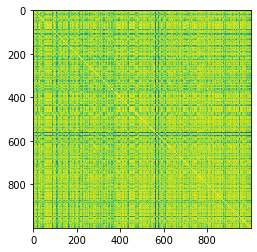

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(S)

In [0]:
df = pd.read_csv('drive/My Drive/Colab Notebooks/spotify/input/all_tracks.csv')

In [22]:
df.head()

,Unnamed: 0,track_id,track_name,track_url,available_markets,disc_number,duration_ms,popularity,preview_url,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,valence,speechiness,key,mode,tempo,time_signature,artist_id,artist_name,artist_url,artist_type,album_url,album_id,album_name,album_image_url,release_date,total_tracks,genre
0,0,18kopBY404pwnBMYoUwQYi,白日,https://open.spotify.com/track/18kopBY404pwnBM...,JP,1,274912,74,https://p.scdn.co/mp3-preview/ea4b717ce07ca1f7...,1,0.67000,0.606,0.901,0.0,0.2890,-2.552,0.748,0.1100,1,1,93.012,4,6wxfx1yhyqjCPYwwxJktR2,King Gnu,https://open.spotify.com/artist/6wxfx1yhyqjCPY...,artist,https://open.spotify.com/album/3cl7Jz2Ul0f2tBI...,3cl7Jz2Ul0f2tBIwtxRtEG,白日,https://i.scdn.co/image/ab67616d0000b27334547f...,2019-02-22,1,j-pop
1,1,58dxGXavrcagRqA58fNB0Z,Pretender,https://open.spotify.com/track/58dxGXavrcagRqA...,JP,1,326842,73,https://p.scdn.co/mp3-preview/be38b0e8369611ca...,7,0.04700,0.538,0.869,0.0,0.1400,-3.464,0.369,0.0275,8,1,91.972,4,5Vo1hnCRmCM6M4thZCInCj,Official HIGE DANdism,https://open.spotify.com/artist/5Vo1hnCRmCM6M4...,artist,https://open.spotify.com/album/2vwgYzudvFwyFe1...,2vwgYzudvFwyFe1Ho9gdUQ,Traveler,https://i.scdn.co/image/d840bba5b8b0528f5277d1...,2019-09-11,7,j-pop
2,2,2cKiHG16JBiqHdi7Llq0r7,マリーゴールド,https://open.spotify.com/track/2cKiHG16JBiqHdi...,JP,1,306626,70,https://p.scdn.co/mp3-preview/3e7e7b371ffc326a...,2,0.04520,0.545,0.745,0.0,0.0907,-3.098,0.413,0.0286,2,1,106.094,4,5kVZa4lFUmAQlBogl1fkd6,Aimyon,https://open.spotify.com/artist/5kVZa4lFUmAQlB...,artist,https://open.spotify.com/album/7fIqmc4GIaueaiA...,7fIqmc4GIaueaiAoDifAaA,瞬間的シックスセンス,https://i.scdn.co/image/ab67616d0000b273c12d78...,2019-02-13,12,j-pop
3,3,5DMEvbg3gUmiR5HIBWdveV,ノーダウト,https://open.spotify.com/track/5DMEvbg3gUmiR5H...,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,C...",1,202394,72,https://p.scdn.co/mp3-preview/b3409baf6c3f0023...,2,0.05850,0.574,0.936,0.0,0.3360,-3.185,0.793,0.0700,2,1,149.953,4,5Vo1hnCRmCM6M4thZCInCj,Official HIGE DANdism,https://open.spotify.com/artist/5Vo1hnCRmCM6M4...,artist,https://open.spotify.com/album/0Iz8ByVqKvdlyl7...,0Iz8ByVqKvdlyl77DV3y3p,エスカパレード,https://i.scdn.co/image/ab67616d0000b273b483b5...,2018-04-11,13,j-pop
4,4,278JqkBGkjDovOYAwE8TW7,115万キロのフィルム,https://open.spotify.com/track/278JqkBGkjDovOY...,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,C...",1,324633,71,https://p.scdn.co/mp3-preview/40f3707f230ab26e...,1,0.00345,0.514,0.791,0.0,0.1410,-1.927,0.482,0.0318,3,1,96.966,4,5Vo1hnCRmCM6M4thZCInCj,Official HIGE DANdism,https://open.spotify.com/artist/5Vo1hnCRmCM6M4...,artist,https://open.spotify.com/album/0Iz8ByVqKvdlyl7...,0Iz8ByVqKvdlyl77DV3y3p,エスカパレード,https://i.scdn.co/image/ab67616d0000b273b483b5...,2018-04-11,13,j-pop


In [0]:
df = df.sort_values(by=['track_id'])

In [25]:
df.head(20)

,Unnamed: 0,track_id,track_name,track_url,available_markets,disc_number,duration_ms,popularity,preview_url,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,valence,speechiness,key,mode,tempo,time_signature,artist_id,artist_name,artist_url,artist_type,album_url,album_id,album_name,album_image_url,release_date,total_tracks,genre
632,632,008jrQKCdBGzQdxp9Fk40z,little flower,https://open.spotify.com/track/008jrQKCdBGzQdx...,JP,1,273306,45,https://p.scdn.co/mp3-preview/543c20dcb851f64b...,1,0.000607,0.584,0.904,0.000000,0.1830,-4.102,0.514,0.0315,2,1,103.966,4,6SY4uTql6IMmzbAJH9oAsJ,Kana Adachi,https://open.spotify.com/artist/6SY4uTql6IMmzb...,artist,https://open.spotify.com/album/74VmT6SHwO273G9...,74VmT6SHwO273G9fxEl2VQ,little flower,https://i.scdn.co/image/ab67616d0000b273fc05bf...,2019-04-15,1,j-pop
361,361,00Nw7w9YQQmJLOmG4ZEGYH,parade,https://open.spotify.com/track/00Nw7w9YQQmJLOm...,JP,1,280320,53,https://p.scdn.co/mp3-preview/47ad5a2c4528ba81...,7,0.199000,0.428,0.667,0.000000,0.2270,-4.000,0.804,0.0397,4,1,204.136,4,5Vo1hnCRmCM6M4thZCInCj,Official HIGE DANdism,https://open.spotify.com/artist/5Vo1hnCRmCM6M4...,artist,https://open.spotify.com/album/5k754JGg1QCJrQv...,5k754JGg1QCJrQvU9YGA1E,ラブとピースは君の中,https://i.scdn.co/image/ab67616d0000b273173158...,2015-04-22,8,j-pop
812,812,01k7uuVtfuOKtbCZ3YMN2L,時代,https://open.spotify.com/track/01k7uuVtfuOKtbC...,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,C...",1,293172,48,https://p.scdn.co/mp3-preview/64e21e2809b51586...,1,0.001980,0.585,0.944,0.000002,0.2920,-3.931,0.591,0.0488,7,1,100.043,4,1XYuC1vxinTjHCNd5clB8C,ARASHI,https://open.spotify.com/artist/1XYuC1vxinTjHC...,artist,https://open.spotify.com/album/6IA1t0U9TjzwtJw...,6IA1t0U9TjzwtJwGdLXD4G,時代,https://i.scdn.co/image/56c467b5478b617edb5e55...,2001-08-01,1,j-pop
85,85,022X58N6Tv7klHzcMzCtAl,飛行艇,https://open.spotify.com/track/022X58N6Tv7klHz...,JP,1,260893,0,https://p.scdn.co/mp3-preview/fe562fd541fed47a...,7,0.071100,0.475,0.841,0.000000,0.3580,-2.940,0.469,0.0446,1,1,79.930,4,6wxfx1yhyqjCPYwwxJktR2,King Gnu,https://open.spotify.com/artist/6wxfx1yhyqjCPY...,artist,https://open.spotify.com/album/7i52WTMXSBFAx6k...,7i52WTMXSBFAx6kUnNdjIK,CEREMONY,https://i.scdn.co/image/a85d880e10ea5ce09c6d95...,2020-01-15,12,j-pop
848,848,02me5PrRaF8baUbyiJ0bv7,プライド革命,https://open.spotify.com/track/02me5PrRaF8baUb...,JP,1,235586,48,https://p.scdn.co/mp3-preview/d889efd7b5e8ccb7...,13,0.005280,0.336,0.937,0.000054,0.3650,-2.249,0.514,0.3570,1,0,184.908,4,7qpGWSiolU9E5WbkvTaMDd,CHiCO with HoneyWorks,https://open.spotify.com/artist/7qpGWSiolU9E5W...,artist,https://open.spotify.com/album/6eyndpBwWu0k0W3...,6eyndpBwWu0k0W3NBhSPfZ,世界はiに満ちている,https://i.scdn.co/image/ab67616d0000b273c1136b...,2015-11-18,14,j-pop
464,464,02xCHhTG3lRknzXq6cbcJh,M,https://open.spotify.com/track/02xCHhTG3lRknzX...,JP,1,275333,52,https://p.scdn.co/mp3-preview/5e6200e3ae371e47...,10,0.106000,0.318,0.482,0.000011,0.2810,-12.015,0.392,0.0353,0,1,81.917,4,2fpbR8VQWHUivTaeLTR5MJ,Princess Princess,https://open.spotify.com/artist/2fpbR8VQWHUivT...,artist,https://open.spotify.com/album/1efWSPtU01xnWdv...,1efWSPtU01xnWdvYeydR43,LET'S GET CRAZY,https://i.scdn.co/image/ab67616d0000b273727579...,1988-11-21,11,j-pop
126,126,03RvvQSoODrEUrK5qF1zXu,Bedtown,https://open.spotify.com/track/03RvvQSoODrEUrK...,JP,1,185466,57,https://p.scdn.co/mp3-preview/662133efe57b6cc4...,11,0.073700,0.619,0.990,0.000000,0.0695,-3.740,0.501,0.2160,7,1,120.018,4,6wxfx1yhyqjCPYwwxJktR2,King Gnu,https://open.spotify.com/artist/6wxfx1yhyqjCPY...,artist,https://open.spotify.com/album/3Dzbad1d0IQnhGk...,3Dzbad1d0IQnhGkrTuLehL,Sympa,https://i.scdn.co/image/ab67616d0000b273c4a739...,2019-01-16,13,j-pop
609,609,04EuDx4WKmkN9NyZ6kk5lj,Do Well,https://open.spotify.com/track/04EuDx4WKmkN9Ny...,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,C...",1,205237,51,https://p.scdn.co/mp3-preview/8a7a420ed6c8b994...,1,0.131000,0.780,0.723,0.000110,0.1440,-8.365,0.478,0.0887,2,1,116.010,4,1HzcHe0WFm

In [26]:
list(df.reset_index().query('track_id == "6ODZT1FGTE2q4two05giS1"').index)

[793]

In [0]:
df_sim = pd.DataFrame(S)

In [28]:
df_sim.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,1.000000,0.969795,0.826778,0.952877,0.979364,0.985751,0.949834,0.893311,0.906505,0.952781,0.962733,0.946966,0.882226,0.932498,0.944775,0.971906,0.957764,0.878867,0.927139,0.936032,0.843979,0.958917,0.969667,0.933209,0.978751,0.940573,0.887504,0.978698,0.938423,0.974886,0.974366,0.960577,0.942892,0.958689,0.902165,0.910914,0.902187,0.937056,0.943583,0.934634,...,0.967452,0.974264,0.926672,0.933927,0.935062,0.936063,0.944866,0.974242,0.930909,0.888065,0.956008,0.963108,0.868455,0.927892,0.948167,0.851111,0.971659,0.827702,0.976263,0.901142,0.976408,0.969513,0.973614,0.960280,0.932568,0.938000,0.968752,0.975932,0.926753,0.926045,0.970435,0.940130,0.980548,0.952784,0.956969,0.822204,0.971677,0.954308,0.916904,0.776505
1,0.969795,1.000000,0.806800,0.974505,0.986561,0.967658,0.932704,0.912108,0.924452,0.907314,0.987219,0.962066,0.853487,0.882573,0.964832,0.963187,0.927318,0.902114,0.885447,0.895335,0.784315,0.912798,0.956864,0.948822,0.984325,0.936690,0.876166,0.952123,0.939919,0.974997,0.938268,0.966361,0.945111,0.947979,0.914720,0.936340,0.924472,0.949784,0.923037,0.944891,...,0.982678,0.976567,0.923939,0.930507,0.959656,0.931403,0.953045,0.965842,0.917822,0.862689,0.940768,0.975292,0.820025,0.917951,0.957059,0.807643,0.962936,0.843036,0.985270,0.897050,0.984665,0.957348,0.989681,0.953926,0.933452,0.973464,0.950622,0.994677,0.937162,0.906183,0.986359,0.973311,0.984440,0.979739,0.958427,0.792711,0.924430,0.970151,0.849381,0.738208
2,0.826778,0.806800,1.000000,0.867867,0.805469,0.844256,0.934587,0.911880,0.835037,0.793772,0.791286,0.863267,0.983625,0.893080,0.831910,0.873941,0.786396,0.933220,0.927055,0.907033,0.931229,0.858458,0.849858,0.868269,0.821591,0.855223,0.879014,0.866189,0.872273,0.880673,0.847804,0.888605,0.910549,0.894524,0.898863,0.876238,0.827788,0.897608,0.913938,0.891597,...,0.814118,0.864545,0.935540,0.923510,0.859440,0.881007,0.888585,0.902034,0.858854,0.975800,0.874432,0.857052,0.955303,0.958219,0.833345,0.912449,0.809516,0.950188,0.828243,0.873997,0.834268,0.878269,0.828142,0.826663,0.829309,0.790412,0.868200,0.815961,0.845363,0.803132,0.834691,0.812671,0.815803,0.757201,0.883105,0.981787,0.768379,0.798032,0.925832,0.971321
3,0.952877,0.974505,0.867867,1.000000,0.971320,0.967413,0.957967,0.922766,0.905497,0.881682,0.979263,0.942576,0.894152,0.883232,0.960983,0.962960,0.884018,0.938754,0.914208,0.931023,0.827348,0.900710,0.929094,0.970944,0.970294,0.905709,0.865221,0.953341,0.955444,0.974082,0.935208,0.950773,0.946010,0.933912,0.940894,0.951334,0.883922,0.954763,0.927255,0.982332,...,0.969260,0.978208,0.930621,0.932363,0.952405,0.923797,0.951426,0.978691,0.907254,0.895589,0.964648,0.976547,0.880418,0.958923,0.938833,0.808088,0.938144,0.893321,0.979126,0.868392,0.980345,0.958953,0.977005,0.929083,0.926309,0.950015,0.960867,0.984737,0.915546,0.861272,0.978234,0.956890,0.969485,0.963174,0.949598,0.840836,0.892395,0.930816,0.879949,0.802334
4,0.979364,0.986561,0.805469,0.971320,1.000000,0.987368,0.945417,0.883669,0.907430,0.918468,0.990964,0.962567,0.857083,0.904264,0.958748,0.983126,0.954430,0.873069,0.915502,0.902756,0.796356,0.937083,0.955588,0.943468,0.988322,0.948523,0.849575,0.971511,0.925536,0.985032,0.941413,0.957891,0.934462,0.931569,0.882616,0.907267,0.893364,0.930366,0.917302,0.933795,...,0.989436,0.968758,0.909969,0.919746,0.934691,0.911534,0.935686,0.967720,0.906773,0.865881,0.936196,0.965560,0.830729,0.916689,0.936913,0.800743,0.979849,0.805908,0.995570,0.874618,0.995002,0.978675,0.983778,0.969705,0.908454,0.956699,0.966977,0.990730,0.919671,0.887199,0.983011,0.961029,0.994367,0.987921,0.952598,0.787107,0.956864,0.955193,0.869398,0.743206


In [29]:
df_sim.iloc[793,:].sort_values(ascending=False).head(6)

793    1.000000
574    0.999656
254    0.993154
850    0.990121
880    0.989247
632    0.988965
Name: 793, dtype: float64

In [31]:
df.iloc[574,:]

Unnamed: 0                                                         846
track_id                                        4a48lWUd64bZgHUDx0GZlj
track_name                                                         新宝島
track_url            https://open.spotify.com/track/4a48lWUd64bZgHU...
available_markets    AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,C...
disc_number                                                          1
duration_ms                                                     305000
popularity                                                          52
preview_url          https://p.scdn.co/mp3-preview/1ffb1bb16fd3f875...
track_number                                                         5
acousticness                                                    0.0013
danceability                                                     0.551
energy                                                           0.919
instrumentalness                                               0.00638
livene

In [32]:
df.iloc[254,:]

Unnamed: 0                                                         556
track_id                                        1v9EovC0CD8tKq88ZEI3Ri
track_name                                                  Everything
track_url            https://open.spotify.com/track/1v9EovC0CD8tKq8...
available_markets    AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,C...
disc_number                                                          1
duration_ms                                                     240972
popularity                                                          50
preview_url          https://p.scdn.co/mp3-preview/a716dfe04da917b6...
track_number                                                         1
acousticness                                                     0.413
danceability                                                     0.645
energy                                                           0.892
instrumentalness                                                     0
livene

In [33]:
df.iloc[850,:]

Unnamed: 0                                                         171
track_id                                        6rEReeuYDZdggaSMF1sybO
track_name                                                       ドラえもん
track_url            https://open.spotify.com/track/6rEReeuYDZdggaS...
available_markets                                                   JP
disc_number                                                          1
duration_ms                                                     239933
popularity                                                          56
preview_url          https://p.scdn.co/mp3-preview/c3bd47814215483d...
track_number                                                         1
acousticness                                                   0.00676
danceability                                                      0.64
energy                                                           0.547
instrumentalness                                              4.95e-05
livene

In [34]:
df.iloc[880,:]

Unnamed: 0                                                         677
track_id                                        71vDsonFaYcVNPqJFBHiVJ
track_name                                                 ロングホープ・フィリア
track_url            https://open.spotify.com/track/71vDsonFaYcVNPq...
available_markets                                                   JP
disc_number                                                          1
duration_ms                                                     295800
popularity                                                          52
preview_url          https://p.scdn.co/mp3-preview/4bdd89de3a107078...
track_number                                                         3
acousticness                                                    0.0202
danceability                                                     0.591
energy                                                           0.962
instrumentalness                                                     0
livene

In [35]:
df.iloc[632,:]

Unnamed: 0                                                          47
track_id                                        53WuztMfY1VH3rLIm0zApQ
track_name                                                      イエスタデイ
track_url            https://open.spotify.com/track/53WuztMfY1VH3rL...
available_markets                                                   JP
disc_number                                                          1
duration_ms                                                     299164
popularity                                                          63
preview_url          https://p.scdn.co/mp3-preview/9f78871f94336fc4...
track_number                                                         1
acousticness                                                    0.0442
danceability                                                     0.541
energy                                                             0.8
instrumentalness                                                     0
livene

In [36]:
list(df.reset_index().query('track_id == "2OCtw3vaD0urZuYOeuNw4V"').index)


[316]

In [37]:
df_sim.iloc[316,:].sort_values(ascending=False).head(6)

316    1.000000
10     0.996833
987    0.994463
654    0.994090
415    0.993934
665    0.993751
Name: 316, dtype: float64

In [0]:
df.iloc[10,:]

Unnamed: 0                                                         389
track_id                                        06BIna6ik1U4hoR0XlSfzw
track_name                                                   輝きだして走ってく
track_url            https://open.spotify.com/track/06BIna6ik1U4hoR...
available_markets    AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,C...
disc_number                                                          1
duration_ms                                                     269466
popularity                                                          46
preview_url          https://p.scdn.co/mp3-preview/6d7c0a54cb14c863...
track_number                                                         1
acousticness                                                    0.0051
danceability                                                     0.444
energy                                                           0.833
instrumentalness                                                     0
livene

In [38]:
df.iloc[987,:]

Unnamed: 0                                                         347
track_id                                        7vBt0nLQ1uPurkqiW7Pibs
track_name                                                      夏のどこかへ
track_url            https://open.spotify.com/track/7vBt0nLQ1uPurkq...
available_markets    AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,C...
disc_number                                                          1
duration_ms                                                     238917
popularity                                                          54
preview_url          https://p.scdn.co/mp3-preview/e50777aeef75d860...
track_number                                                         2
acousticness                                                   0.00174
danceability                                                     0.549
energy                                                           0.939
instrumentalness                                                     0
livene

In [39]:
df.iloc[654,:]

Unnamed: 0                                                         906
track_id                                        5DtsD7m3yQAD4KyrsjzHA1
track_name                                                         エソラ
track_url            https://open.spotify.com/track/5DtsD7m3yQAD4Ky...
available_markets                                                JP,TW
disc_number                                                          1
duration_ms                                                     304213
popularity                                                          44
preview_url          https://p.scdn.co/mp3-preview/482a805d7cbbbce6...
track_number                                                         3
acousticness                                                   0.00643
danceability                                                     0.547
energy                                                           0.899
instrumentalness                                              2.45e-05
livene

In [40]:
df.iloc[415,:]

Unnamed: 0                                                         833
track_id                                        3DgBxV8oklNgwhnkfQNIdi
track_name                                                    努努-ゆめゆめ-
track_url            https://open.spotify.com/track/3DgBxV8oklNgwhn...
available_markets                                                   JP
disc_number                                                          1
duration_ms                                                     195666
popularity                                                          48
preview_url          https://p.scdn.co/mp3-preview/255f71ba58fe116d...
track_number                                                         5
acousticness                                                   0.00307
danceability                                                     0.554
energy                                                           0.951
instrumentalness                                                     0
livene

In [41]:
df.iloc[665,:]

Unnamed: 0                                                         598
track_id                                        5IwRgi599tbwNi9wqPYyIX
track_name                                                     Jupiter
track_url            https://open.spotify.com/track/5IwRgi599tbwNi9...
available_markets                                                   JP
disc_number                                                          1
duration_ms                                                     361000
popularity                                                          52
preview_url          https://p.scdn.co/mp3-preview/0485b31aad8a770f...
track_number                                                        13
acousticness                                                      0.42
danceability                                                     0.333
energy                                                           0.577
instrumentalness                                                     0
livene